In [35]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Load the data
df = pd.read_csv('LB_Secondary_Defense.csv')
metric = 'Current_PFF'  # Metric to predict

In [37]:
print(df.columns)

Index(['Team', 'Year', 'Position', 'Value_cap_space', 'Value_draft_data',
       'Current_AV', 'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       ...
       'Previous_snap_counts_pass_rush', 'Previous_snap_counts_run_defense',
       'Previous_snap_counts_slot', 'Previous_stops', 'Previous_tackles',
       'Previous_tackles_for_loss', 'Previous_targets',
       'Previous_total_pressures', 'Previous_touchdowns', 'Previous_yards'],
      dtype='object', length=108)


In [38]:
df = df.sort_values(by=['Team', 'Year'])

# Display the sorted data
print(df.head())

      Team  Year Position  Value_cap_space  Value_draft_data  Current_AV  \
17   49ers  2019       LB        15.993624        146.484990        28.0   
50   49ers  2020       LB         2.991927        144.514132        34.0   
70   49ers  2021       LB         4.131507        110.101206        26.0   
123  49ers  2022       LB         7.934678         48.812538        33.0   
12   Bears  2019       LB         9.681190        491.560918        35.0   

     Current_PFF Total DVOA  win-loss-pct  Net EPA  ...  \
17     63.131934     27.90%      0.812500    0.216  ...   
50     73.581955      5.40%      0.375000    0.025  ...   
70     66.076498     19.50%      0.588235    0.081  ...   
123    79.201195     27.60%      0.764706    0.196  ...   
12     64.207627     -2.10%      0.500000   -0.032  ...   

     Previous_snap_counts_pass_rush  Previous_snap_counts_run_defense  \
17                        48.207362                        268.502249   
50                        39.768498       

In [39]:
team_data = df.groupby('Team')
print(team_data.head)

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x31b44a4d0>>


In [40]:
import numpy as np

sequences = []
targets = []
teams = []

# Iterate over each team and its respective data
for team, group in team_data:
    teams.append(team)
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['win-loss-pct', 'Current_AV', 'Current_PFF', 'weighted_avg_grades_coverage_defense', 'weighted_avg_grades_pass_rush_defense', 
                'weighted_avg_sacks', 'weighted_avg_total_pressures', 'Previous_grades_coverage_defense']]
  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Net EPA']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [41]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

[[[8.12500000e-01 2.80000000e+01 6.31319342e+01 7.16852012e+01
   6.05466897e+01 1.74686283e+00 6.79575941e+00 5.70514928e+01]
  [3.75000000e-01 3.40000000e+01 7.35819553e+01 7.49571012e+01
   6.68554475e+01 8.13715953e-01 1.05783074e+01 7.16852012e+01]
  [5.88235294e-01 2.60000000e+01 6.60764975e+01 6.49152662e+01
   6.14067804e+01 1.55990017e+00 5.80657238e+00 7.49571012e+01]]

 [[5.00000000e-01 3.50000000e+01 6.42076271e+01 6.11603689e+01
   7.00199900e+01 1.76121635e+00 8.38783649e+00 6.60158263e+01]
  [5.00000000e-01 4.10000000e+01 5.68467431e+01 6.65120375e+01
   6.65588327e+01 3.08077124e+00 1.04471079e+01 6.11603689e+01]
  [3.52941176e-01 2.50000000e+01 4.07163694e+01 5.32895593e+01
   5.74166317e+01 1.58971668e+00 6.23189927e+00 6.65120375e+01]]

 [[1.25000000e-01 2.20000000e+01 5.34725898e+01 5.81417769e+01
   5.37155009e+01 0.00000000e+00 7.51228733e+00 4.89520527e+01]
  [2.50000000e-01 2.60000000e+01 4.75816373e+01 6.06861149e+01
   5.76499774e+01 3.54138399e-01 4.28946178e

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
# Define the input layer
inputs = Input(shape=(3, 8))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)

In [44]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Epoch 1/50


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0169 - val_loss: 0.0093
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0158 - val_loss: 0.0118
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0186 - val_loss: 0.0182
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0165 - val_loss: 0.0292
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0219 - val_loss: 0.0236
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0177 - val_loss: 0.0146
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0170 - val_loss: 0.0139
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0143 - val_loss: 0.0149
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0160 - val_loss: 0.0186
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0143 - val_loss: 0.0221
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0130 - val_loss: 0.0187
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0131 - val_loss: 0.0153
Epoch 13/50
2/2 ━━━━

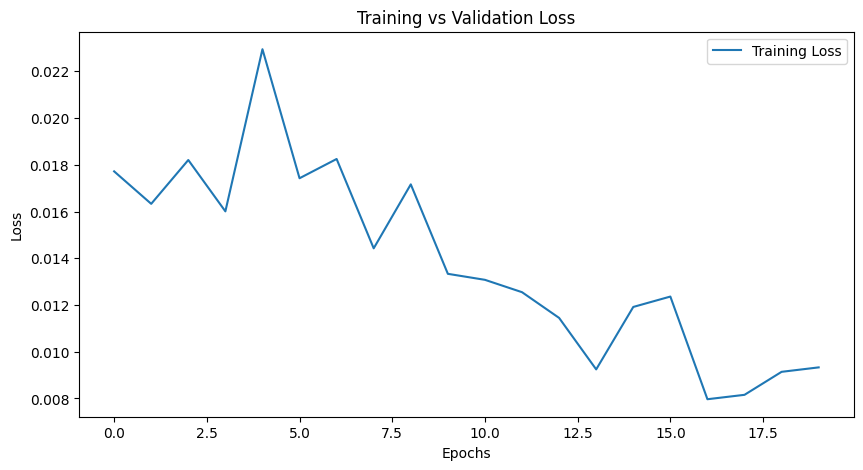

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32
R² Score: -0.1667


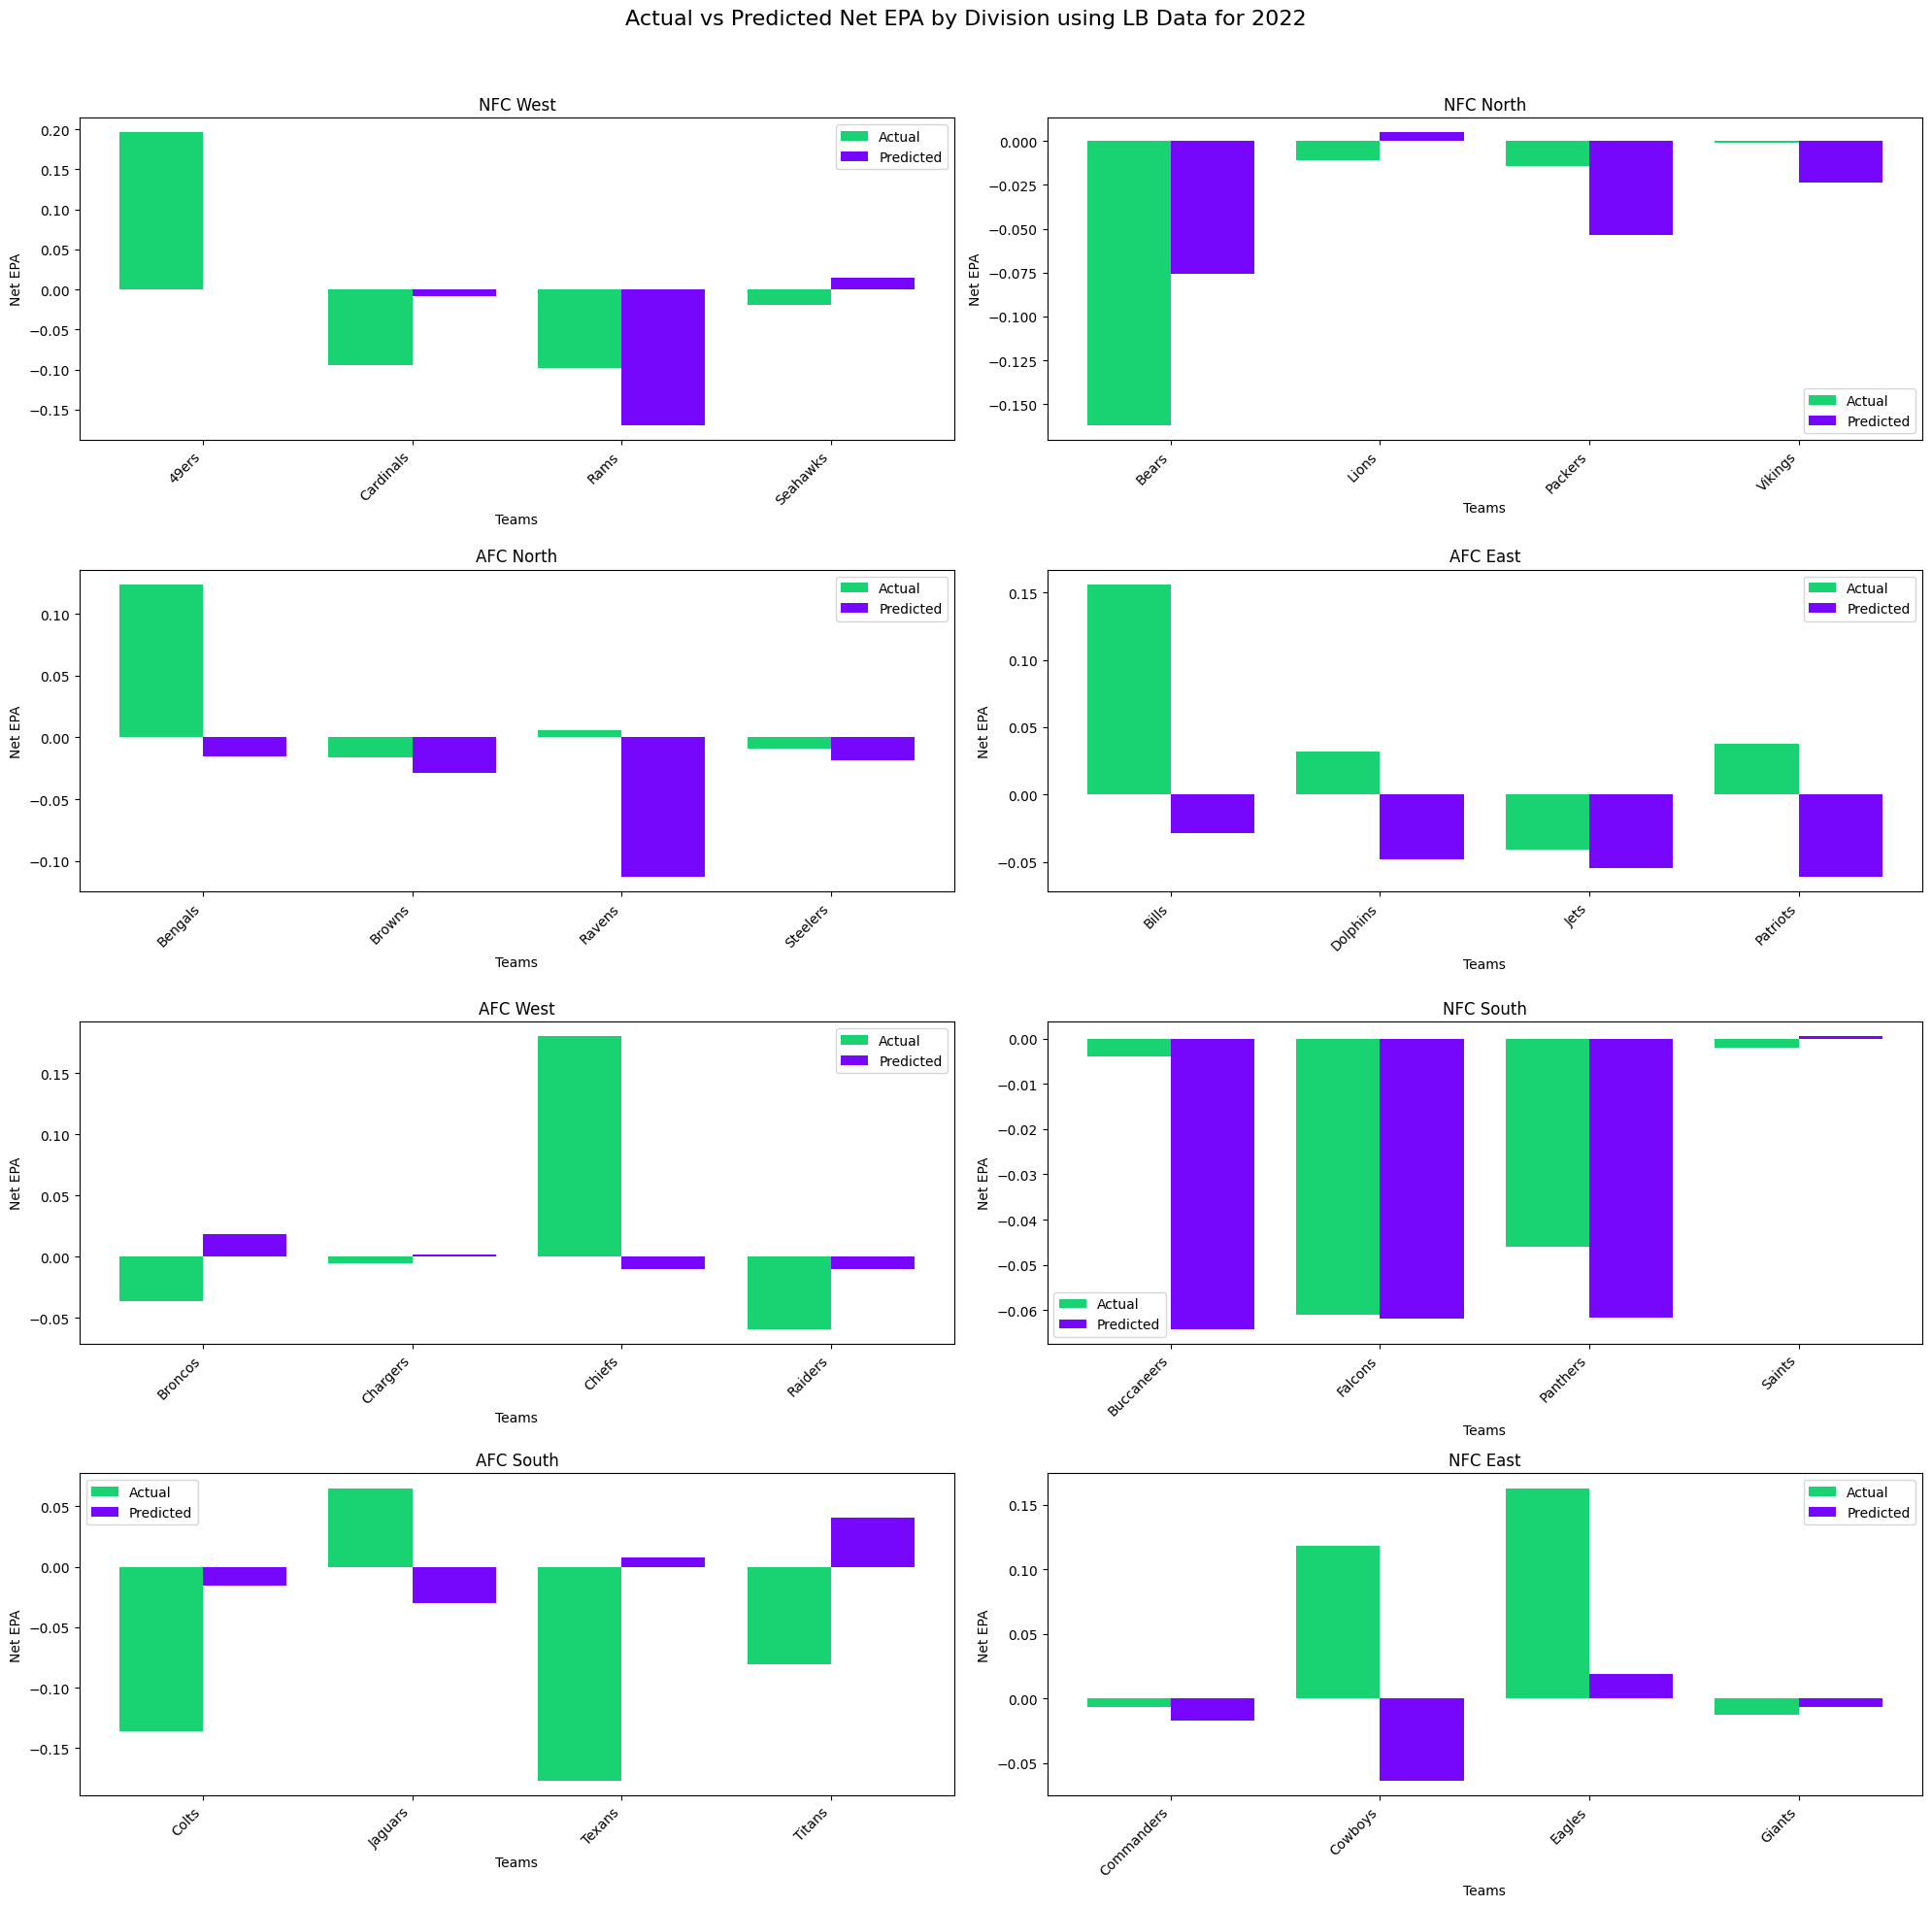

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - val_loss: 0.0121
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0227 - val_loss: 0.0130
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0154 - val_loss: 0.0160
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0204 - val_loss: 0.0154
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0140 - val_loss: 0.0108
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0155 - val_loss: 0.0091
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0200 - val_loss: 0.0131
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0119 - val_loss: 0.0206
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0254 - val_loss: 0.0220
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0188 - val_loss: 0.0220
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0131 - val_loss: 0.0213
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0174 - val_loss:

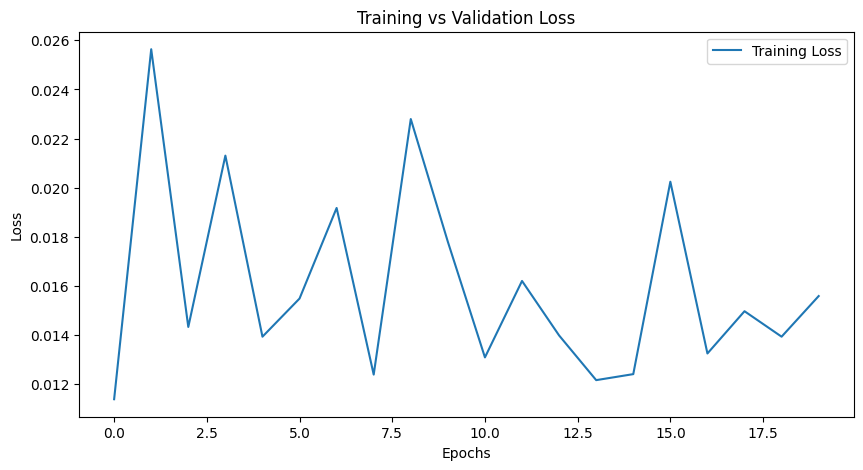

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32
R² Score: -0.0791


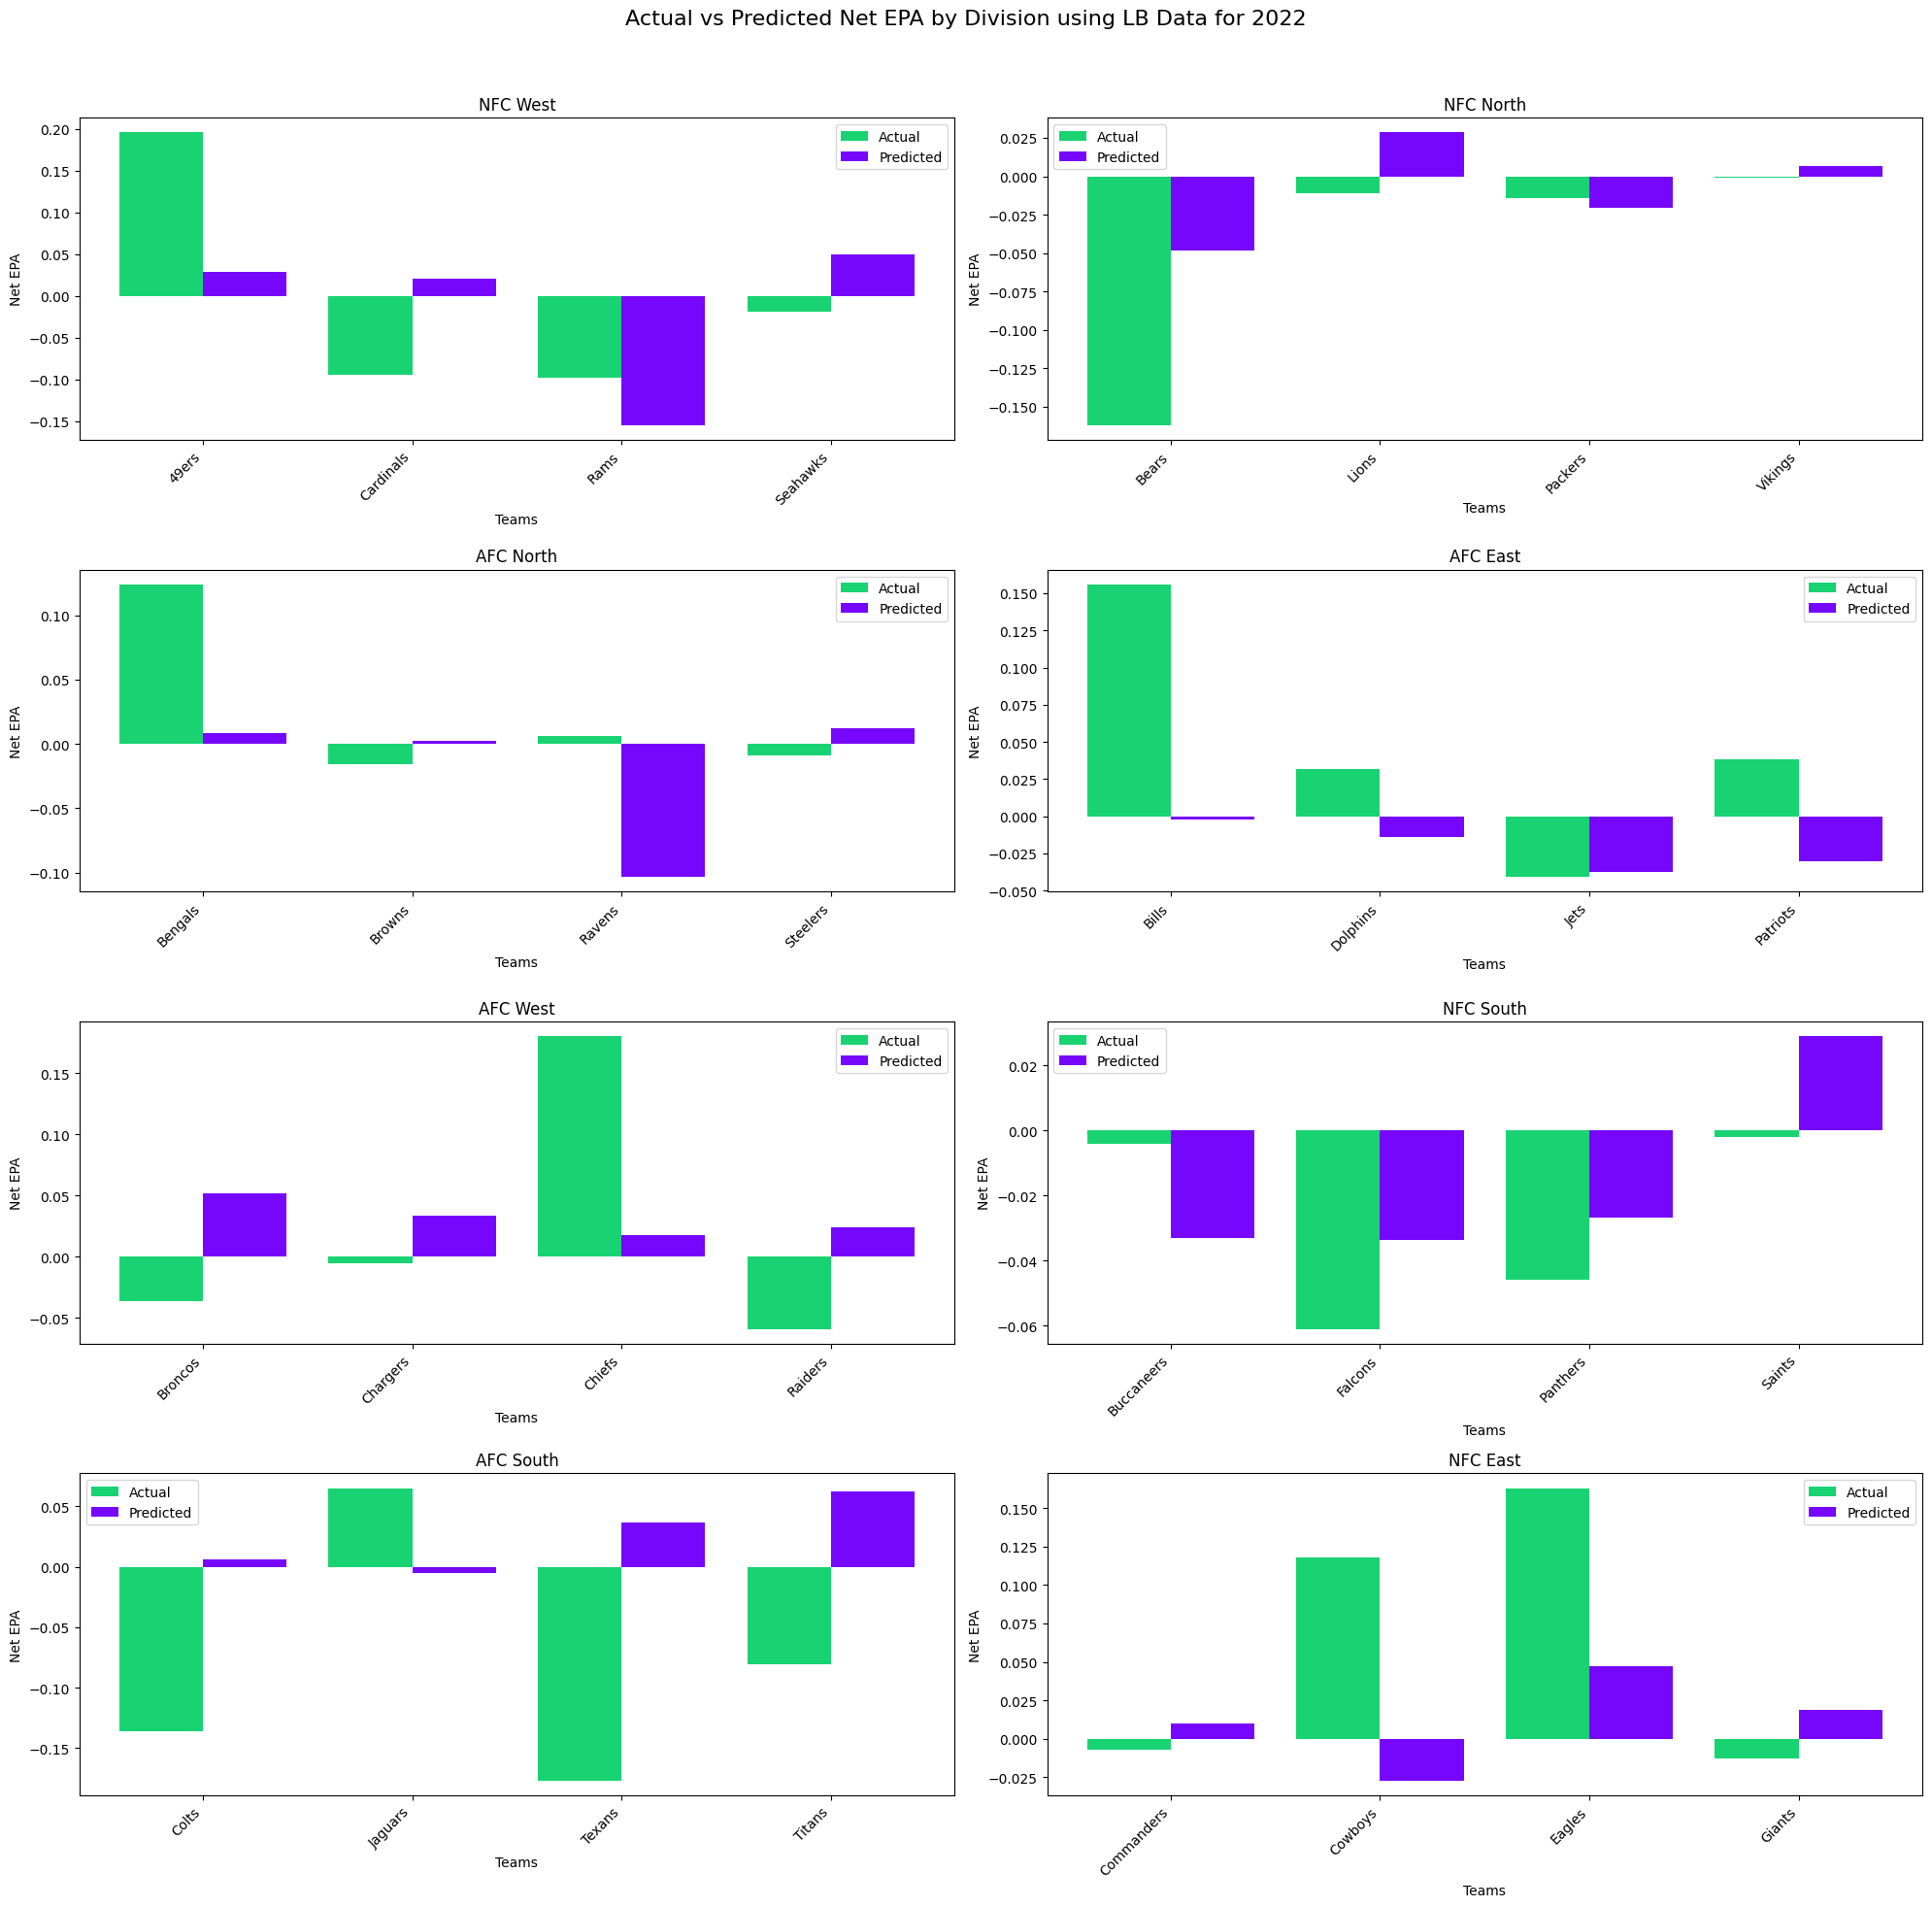

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0157 - val_loss: 0.0088
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0174 - val_loss: 0.0088
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0196 - val_loss: 0.0189
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0232 - val_loss: 0.0230
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0162 - val_loss: 0.0191
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0178 - val_loss: 0.0144
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0167 - val_loss: 0.0103
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0169 - val_loss: 0.0086
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0141 - val_loss: 0.0120
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0119 - val_loss: 0.0185
Epoch 11/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0080 - val_loss: 0.0245
Epoch 12/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0283 - val_loss: 0.0

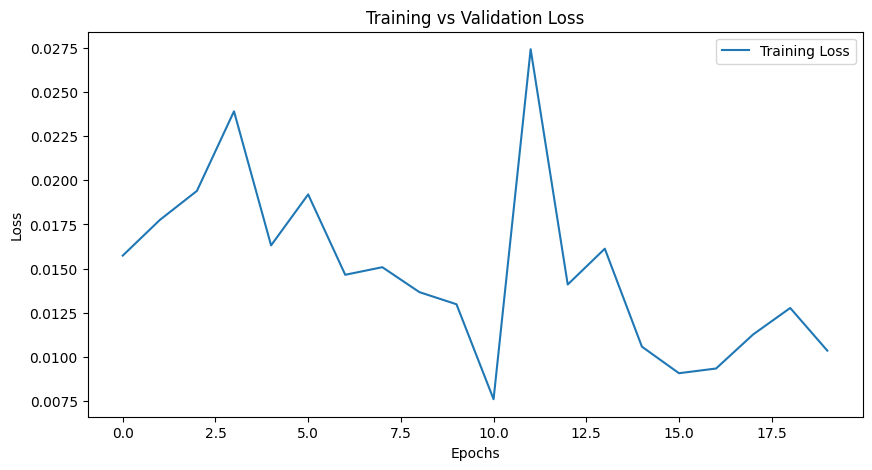

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32
R² Score: -0.2428


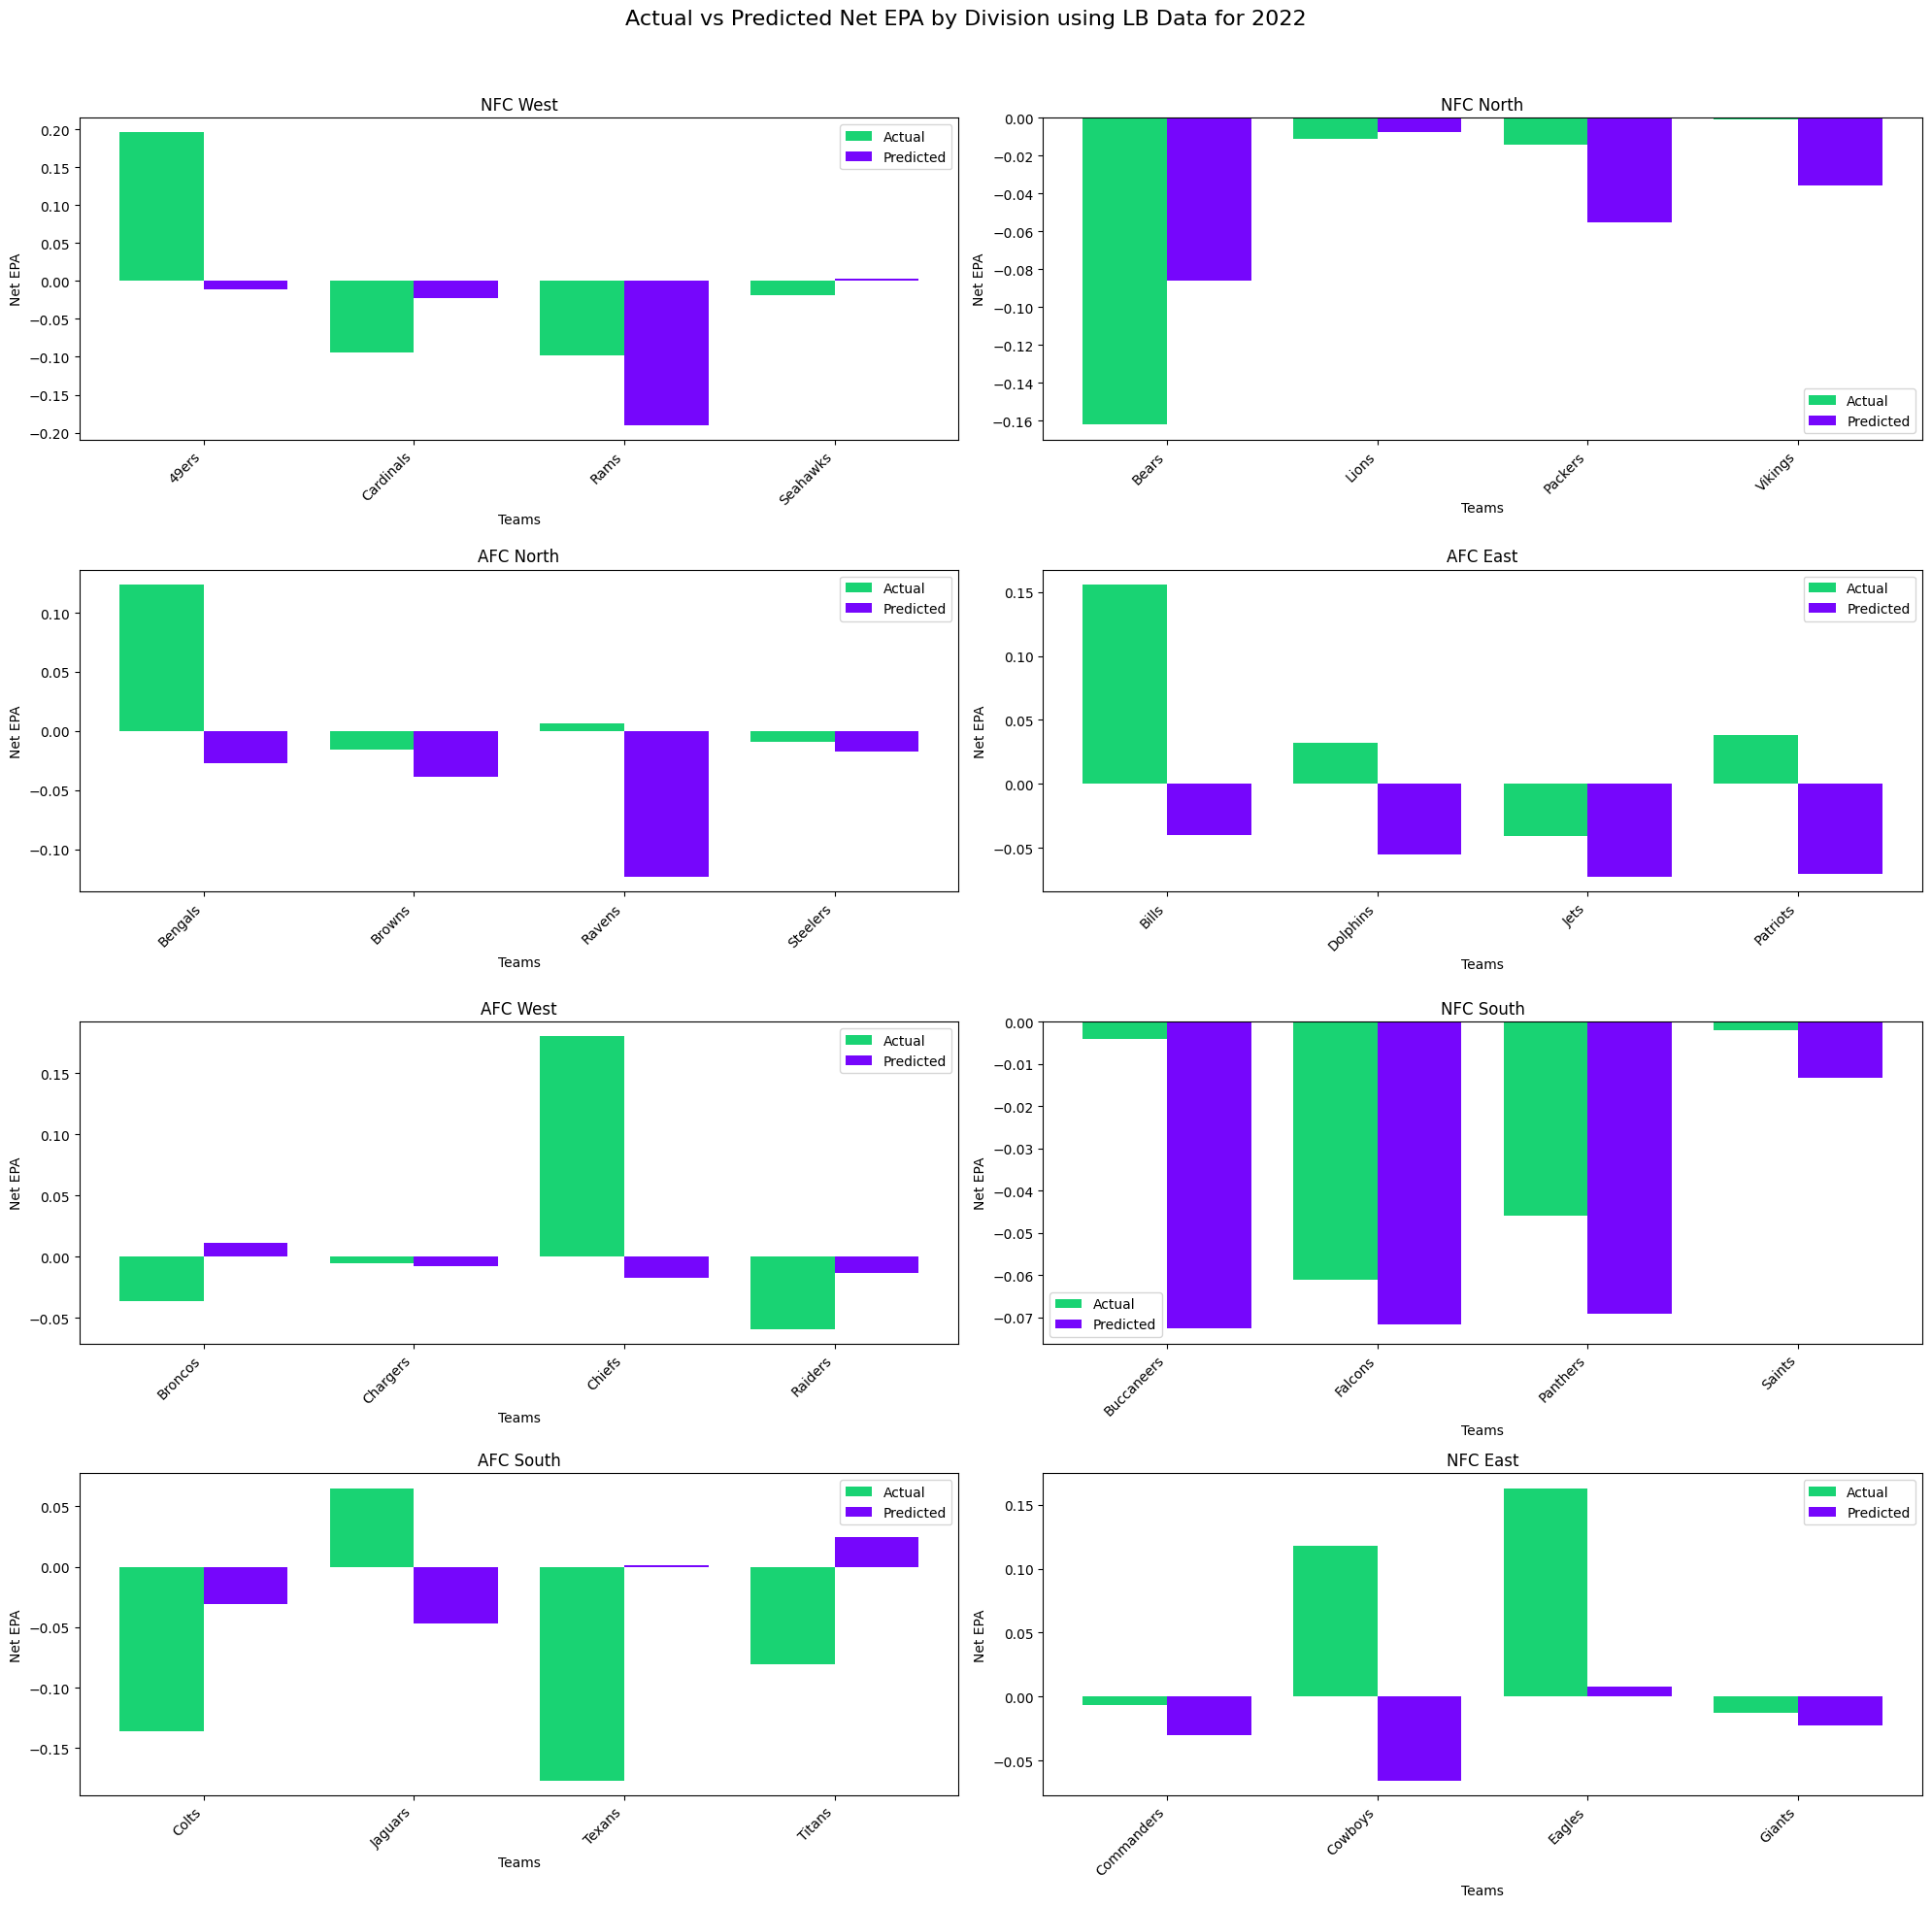

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0218 - val_loss: 0.0125
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0128 - val_loss: 0.0214
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0217 - val_loss: 0.0216
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0171 - val_loss: 0.0159
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0250 - val_loss: 0.0139
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0126 - val_loss: 0.0130
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0120 - val_loss: 0.0129
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0215 - val_loss: 0.0147
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0115 - val_loss: 0.0139
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0185 - val_loss: 0.0159
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0083 - val_loss: 0.0174
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0118 - val_loss: 0.0

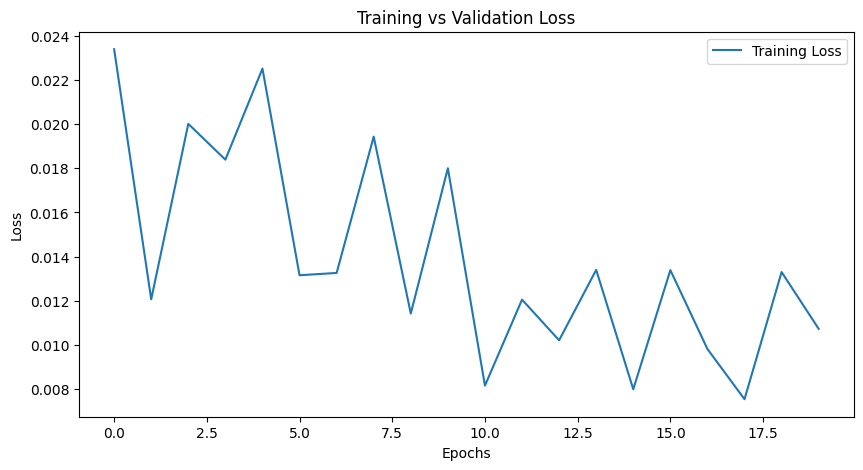

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32
R² Score: -0.0926


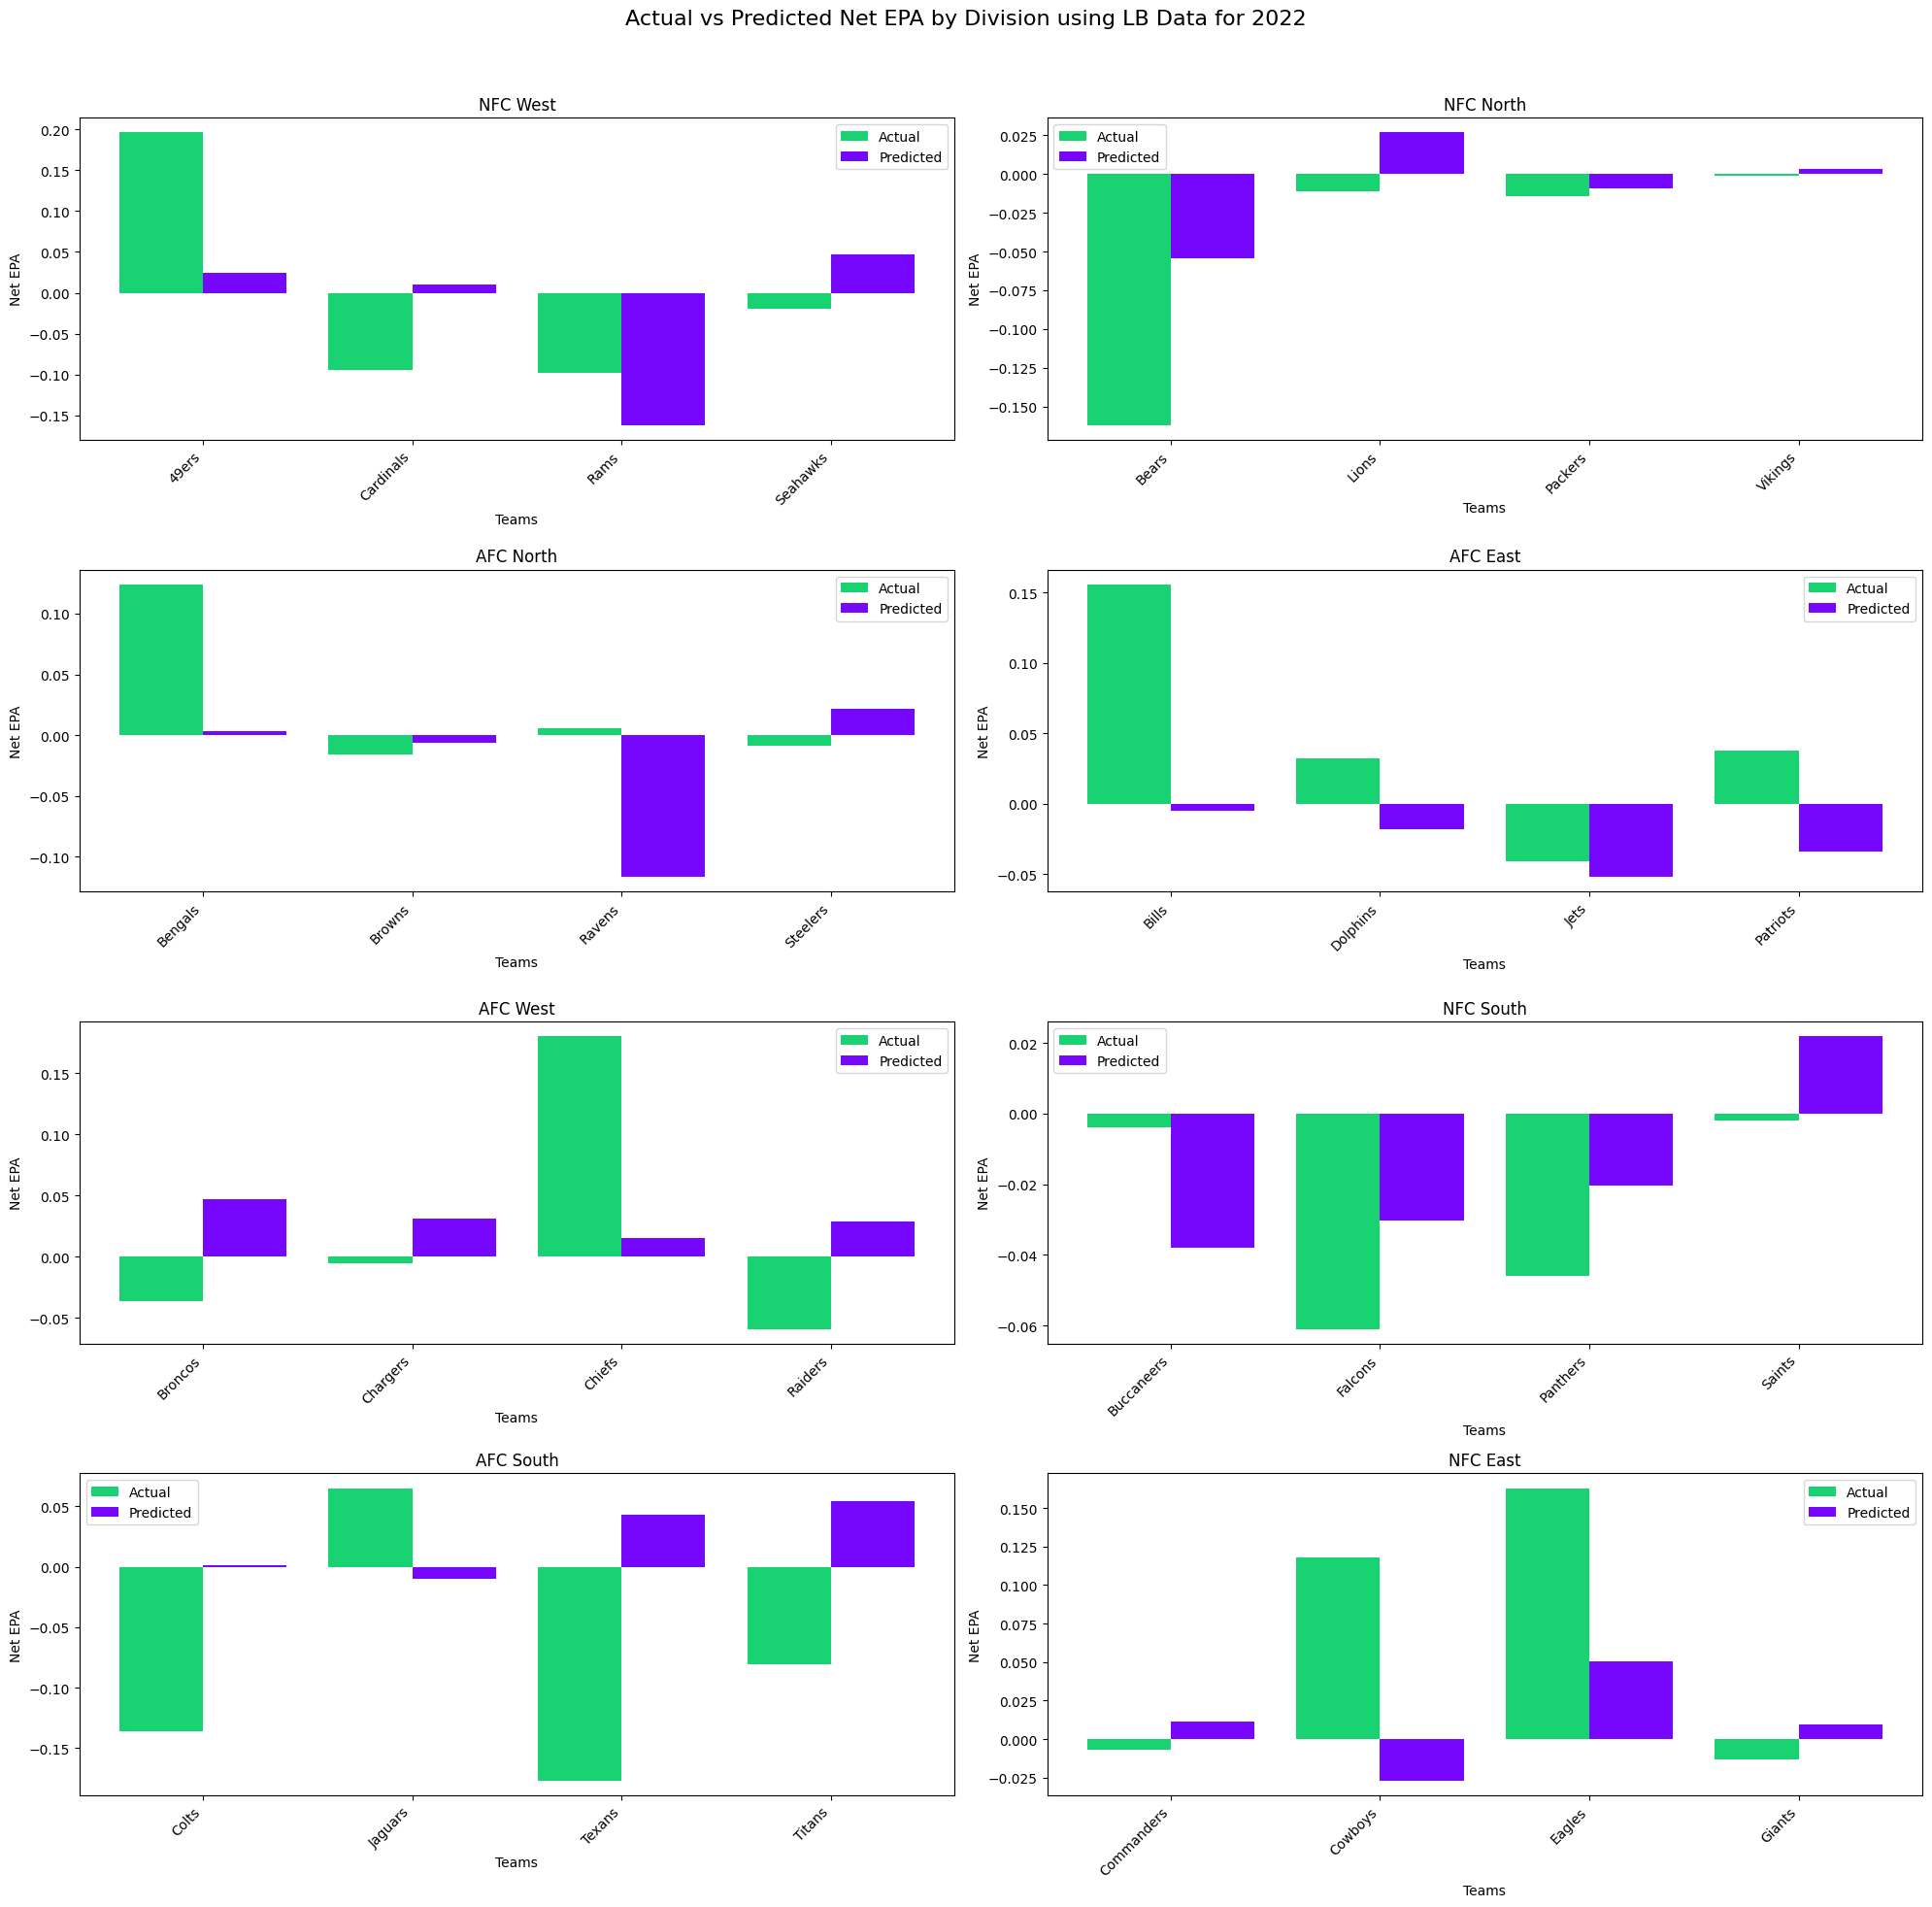

Epoch 1/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0195 - val_loss: 0.0134
Epoch 2/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0127 - val_loss: 0.0170
Epoch 3/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0175 - val_loss: 0.0160
Epoch 4/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0196 - val_loss: 0.0142
Epoch 5/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0142 - val_loss: 0.0112
Epoch 6/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0100 - val_loss: 0.0104
Epoch 7/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0193 - val_loss: 0.0126
Epoch 8/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0179 - val_loss: 0.0207
Epoch 9/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0168 - val_loss: 0.0251
Epoch 10/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0152 - val_loss: 0.0186
Epoch 11/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0150 - val_loss: 0.0167
Epoch 12/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - val_loss: 

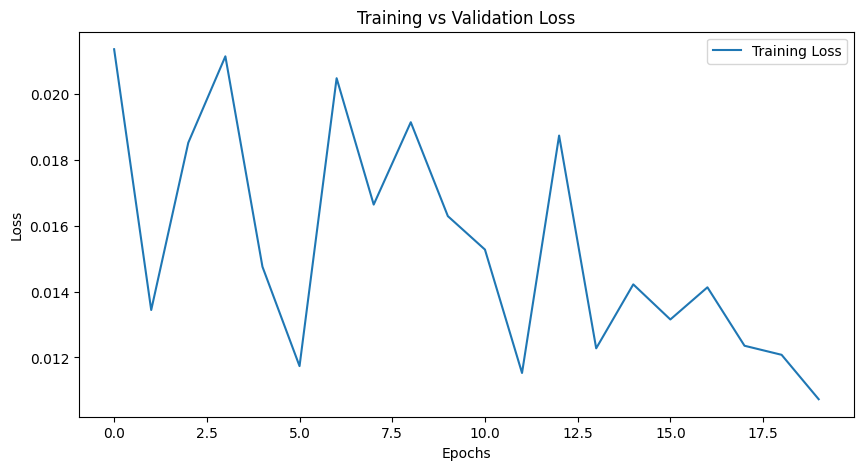

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
32
R² Score: -0.0993


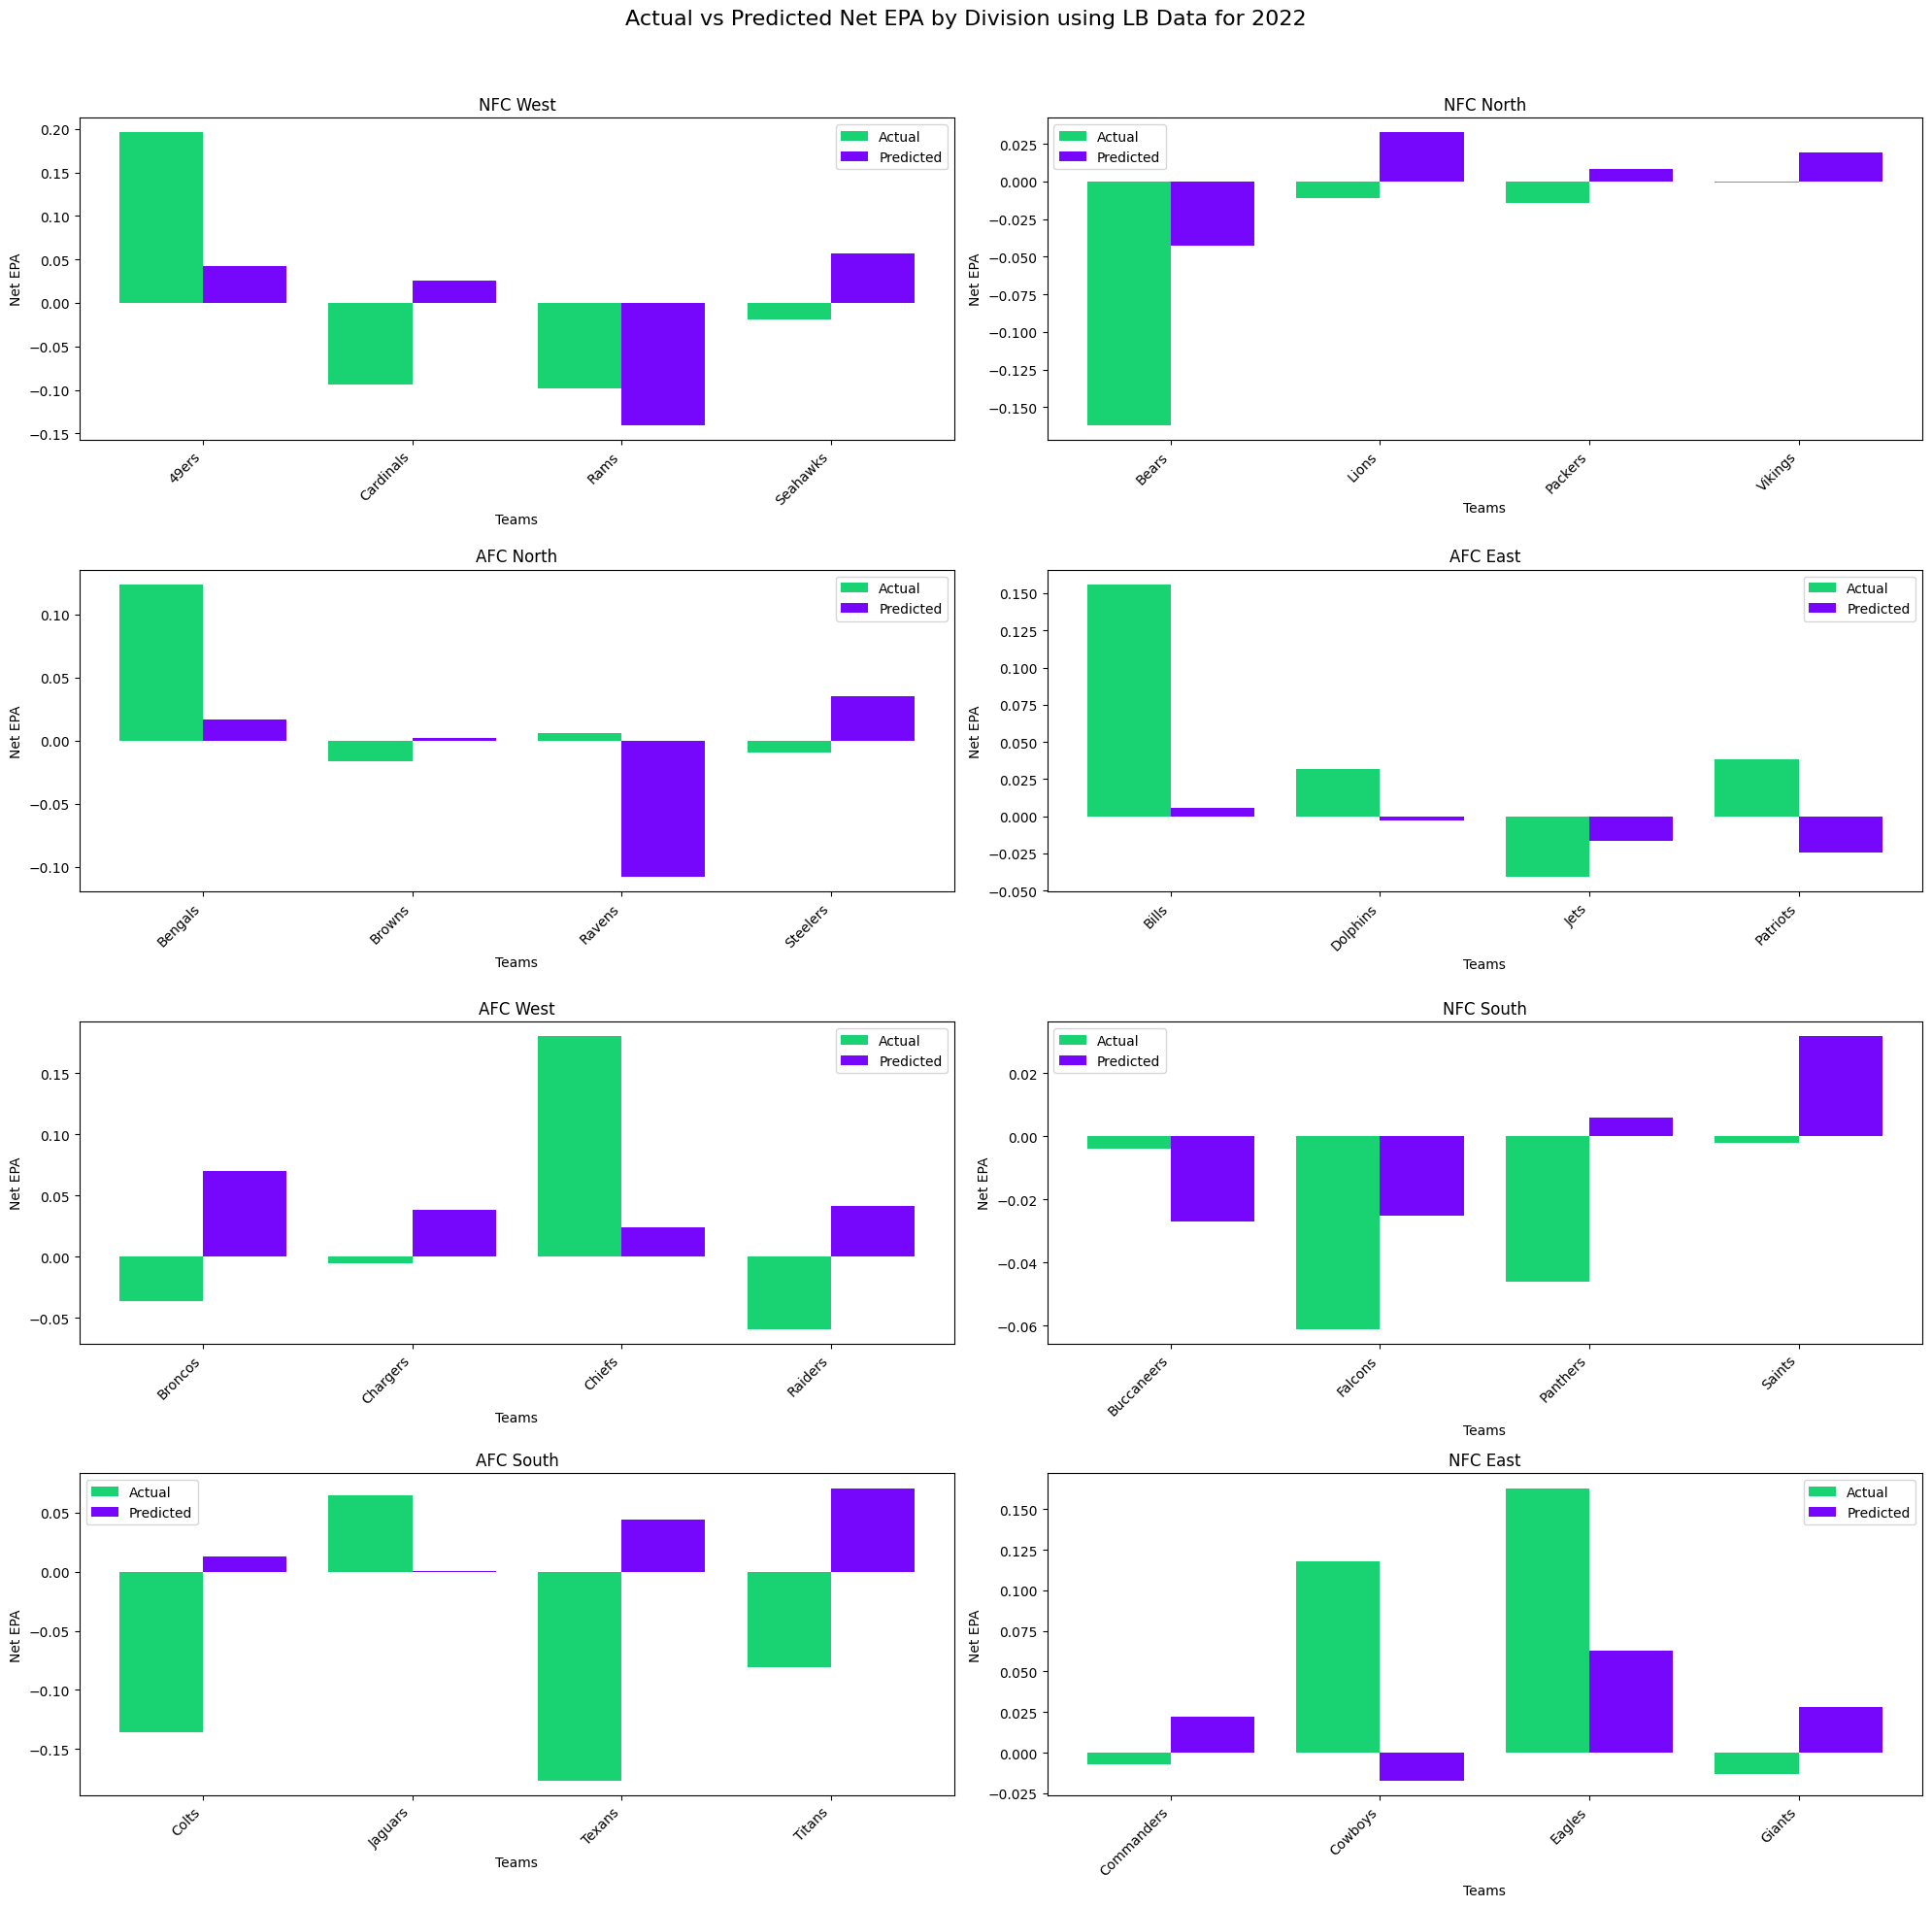

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0204 - val_loss: 0.0194
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0129 - val_loss: 0.0189
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0110 - val_loss: 0.0169
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0120 - val_loss: 0.0159
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0183 - val_loss: 0.0159
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0135 - val_loss: 0.0173
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0153 - val_loss: 0.0174
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0135 - val_loss: 0.0172
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0160 - val_loss: 0.0160
Epoch 10/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0131 - val_loss: 0.0154
Epoch 11/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0122 - val_loss: 0.0164
Epoch 12/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0148 - val_loss: 0.0187

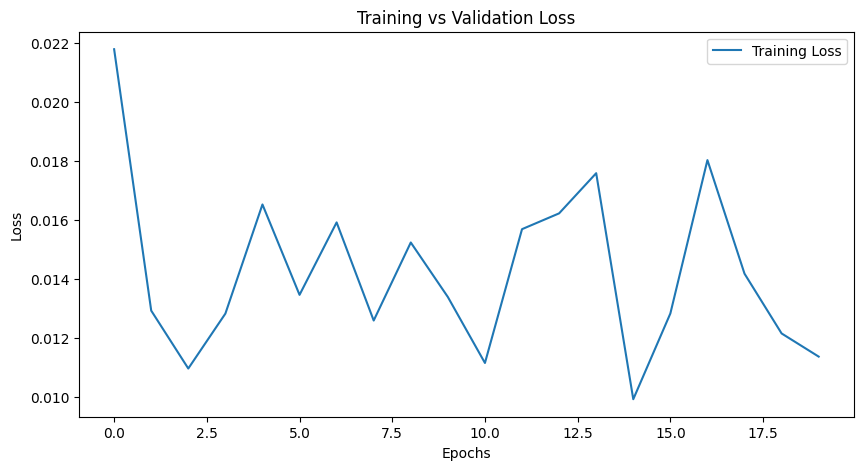

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32
R² Score: -0.3274


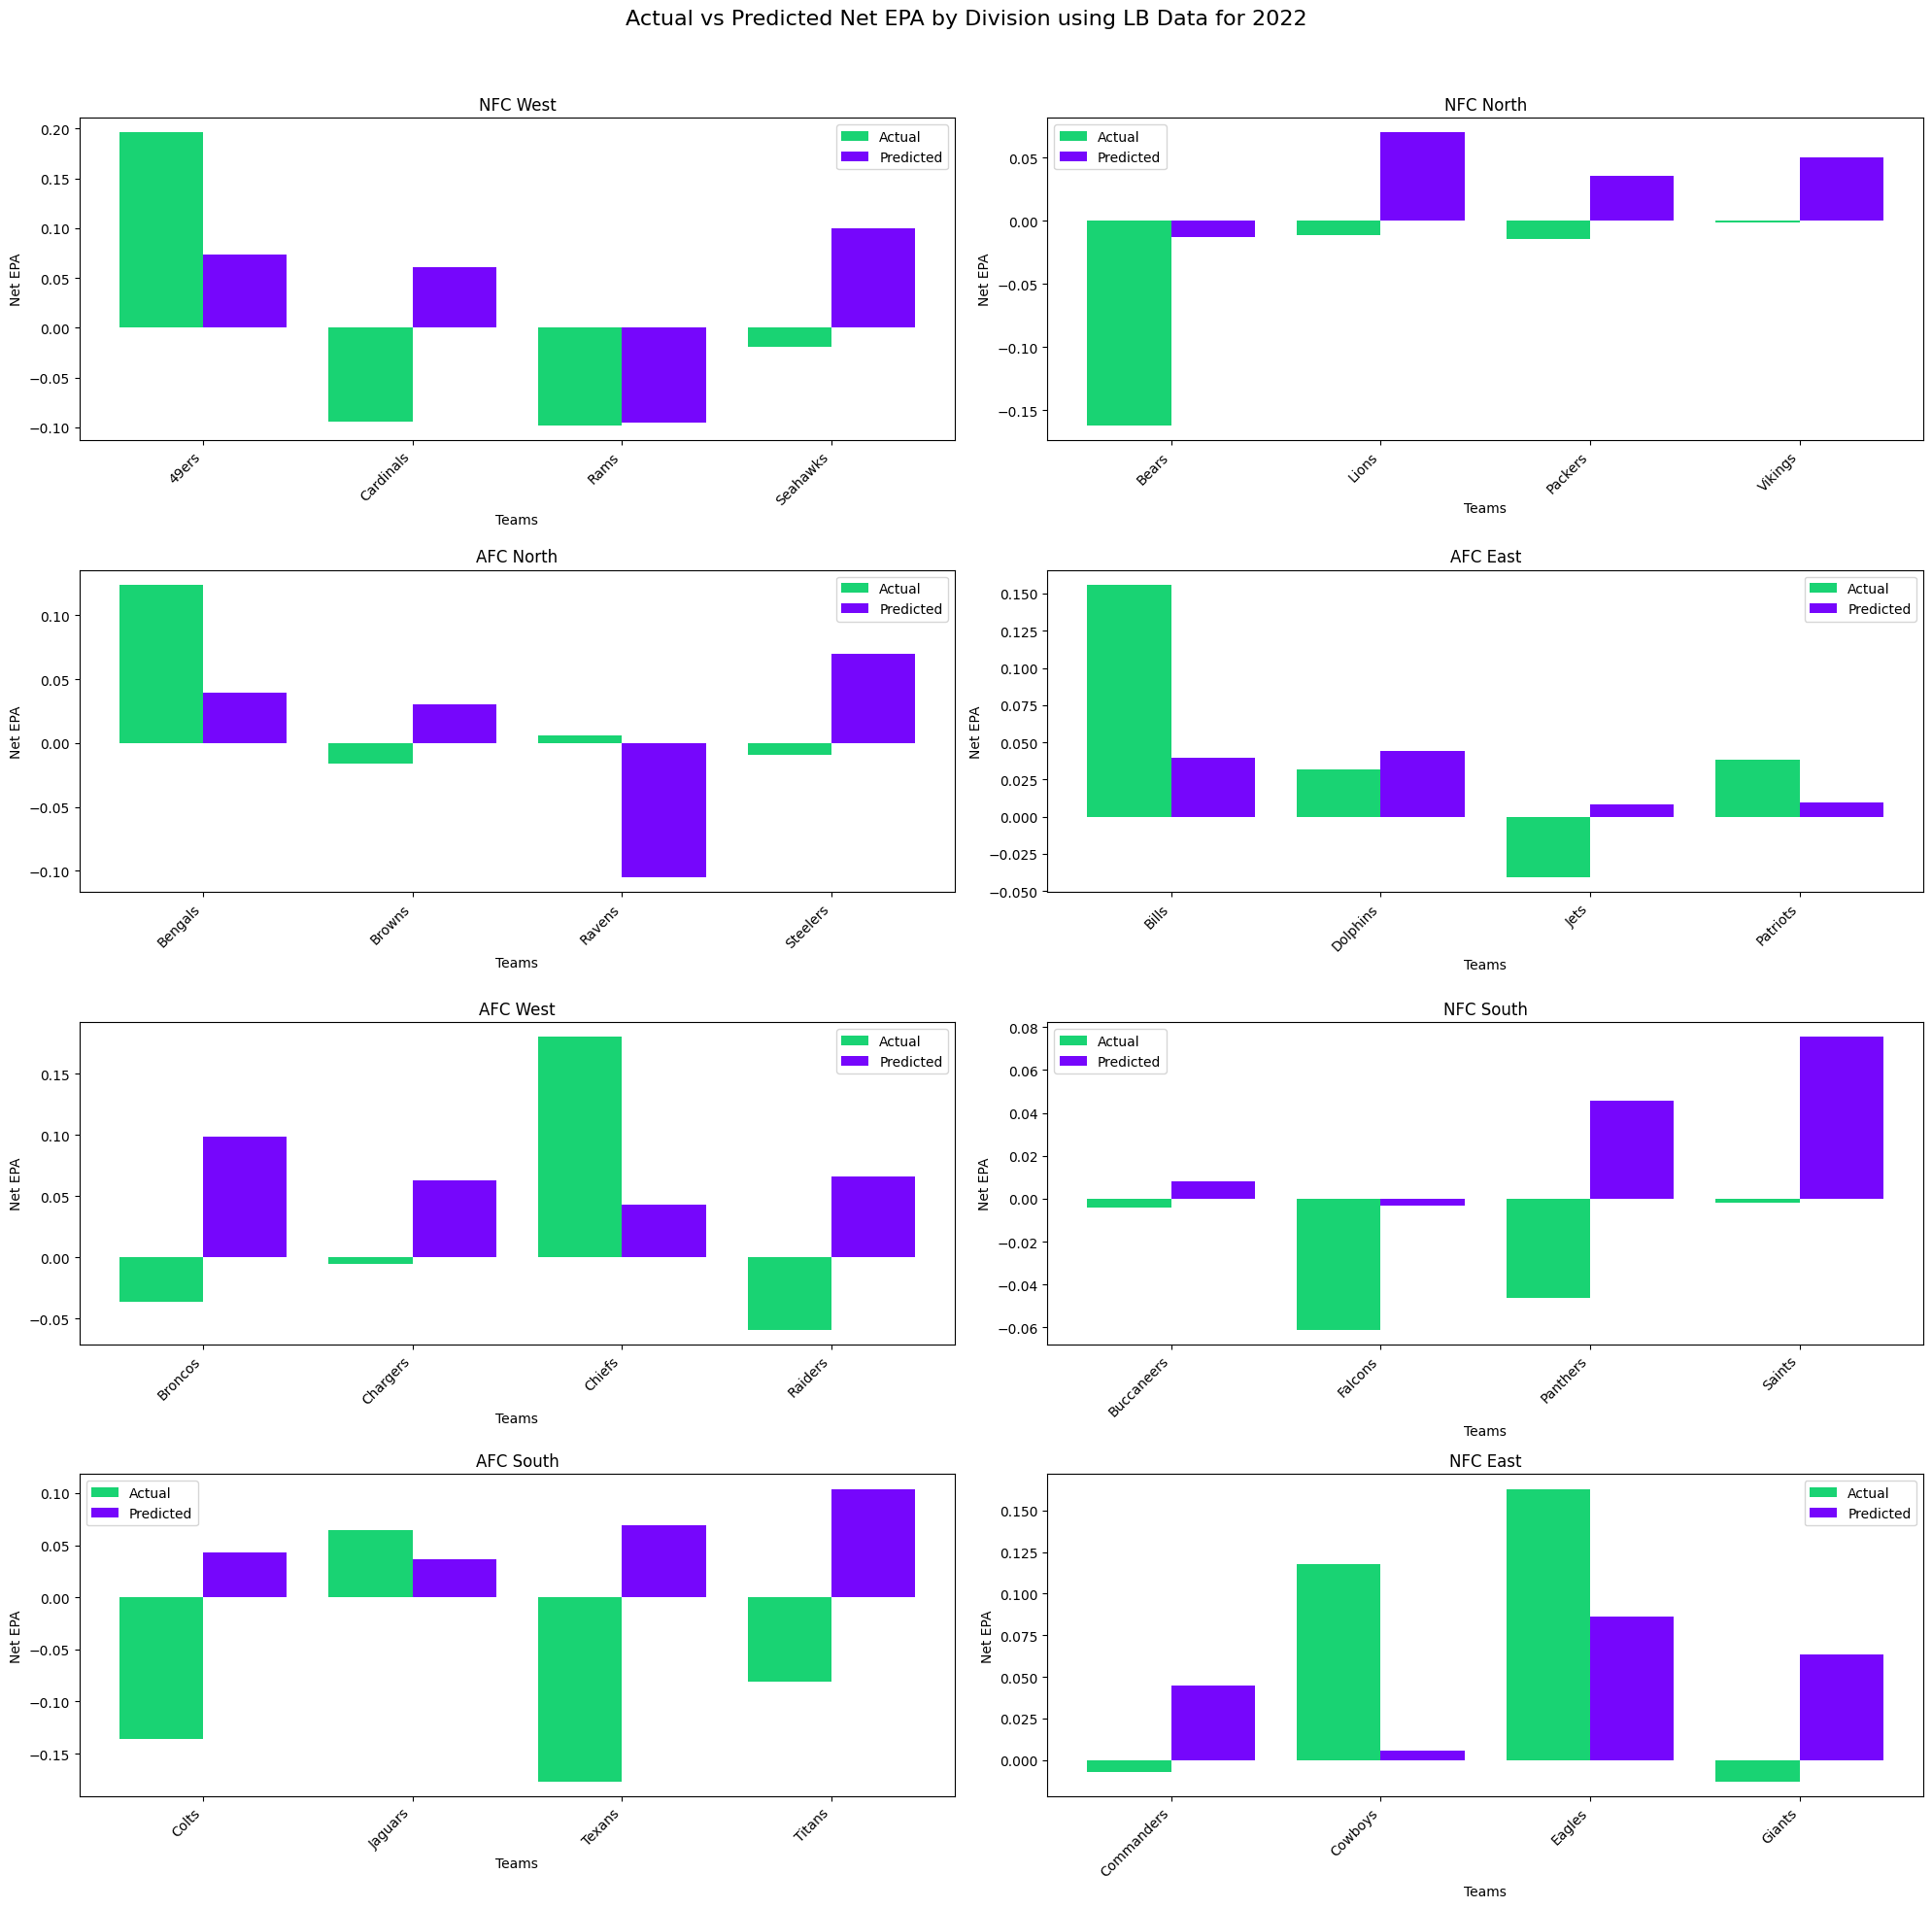

Epoch 1/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0174 - val_loss: 0.0131
Epoch 2/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0154 - val_loss: 0.0139
Epoch 3/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0185 - val_loss: 0.0171
Epoch 4/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0140 - val_loss: 0.0225
Epoch 5/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0215 - val_loss: 0.0234
Epoch 6/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0175 - val_loss: 0.0188
Epoch 7/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0075 - val_loss: 0.0151
Epoch 8/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0187 - val_loss: 0.0142
Epoch 9/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0139 - val_loss: 0.0150
Epoch 10/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0140 - val_loss: 0.0197
Epoch 11/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0180 - val_loss: 0.0246
Epoch 12/350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0128 - val_loss: 0.

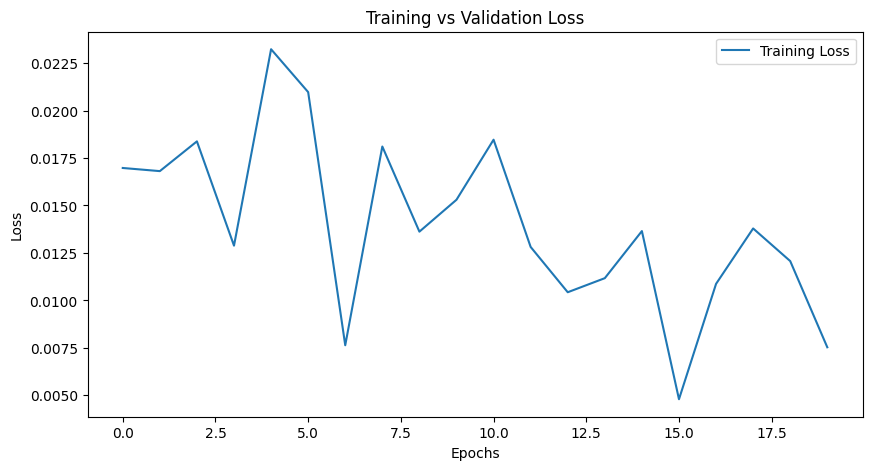

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32
R² Score: -0.1312


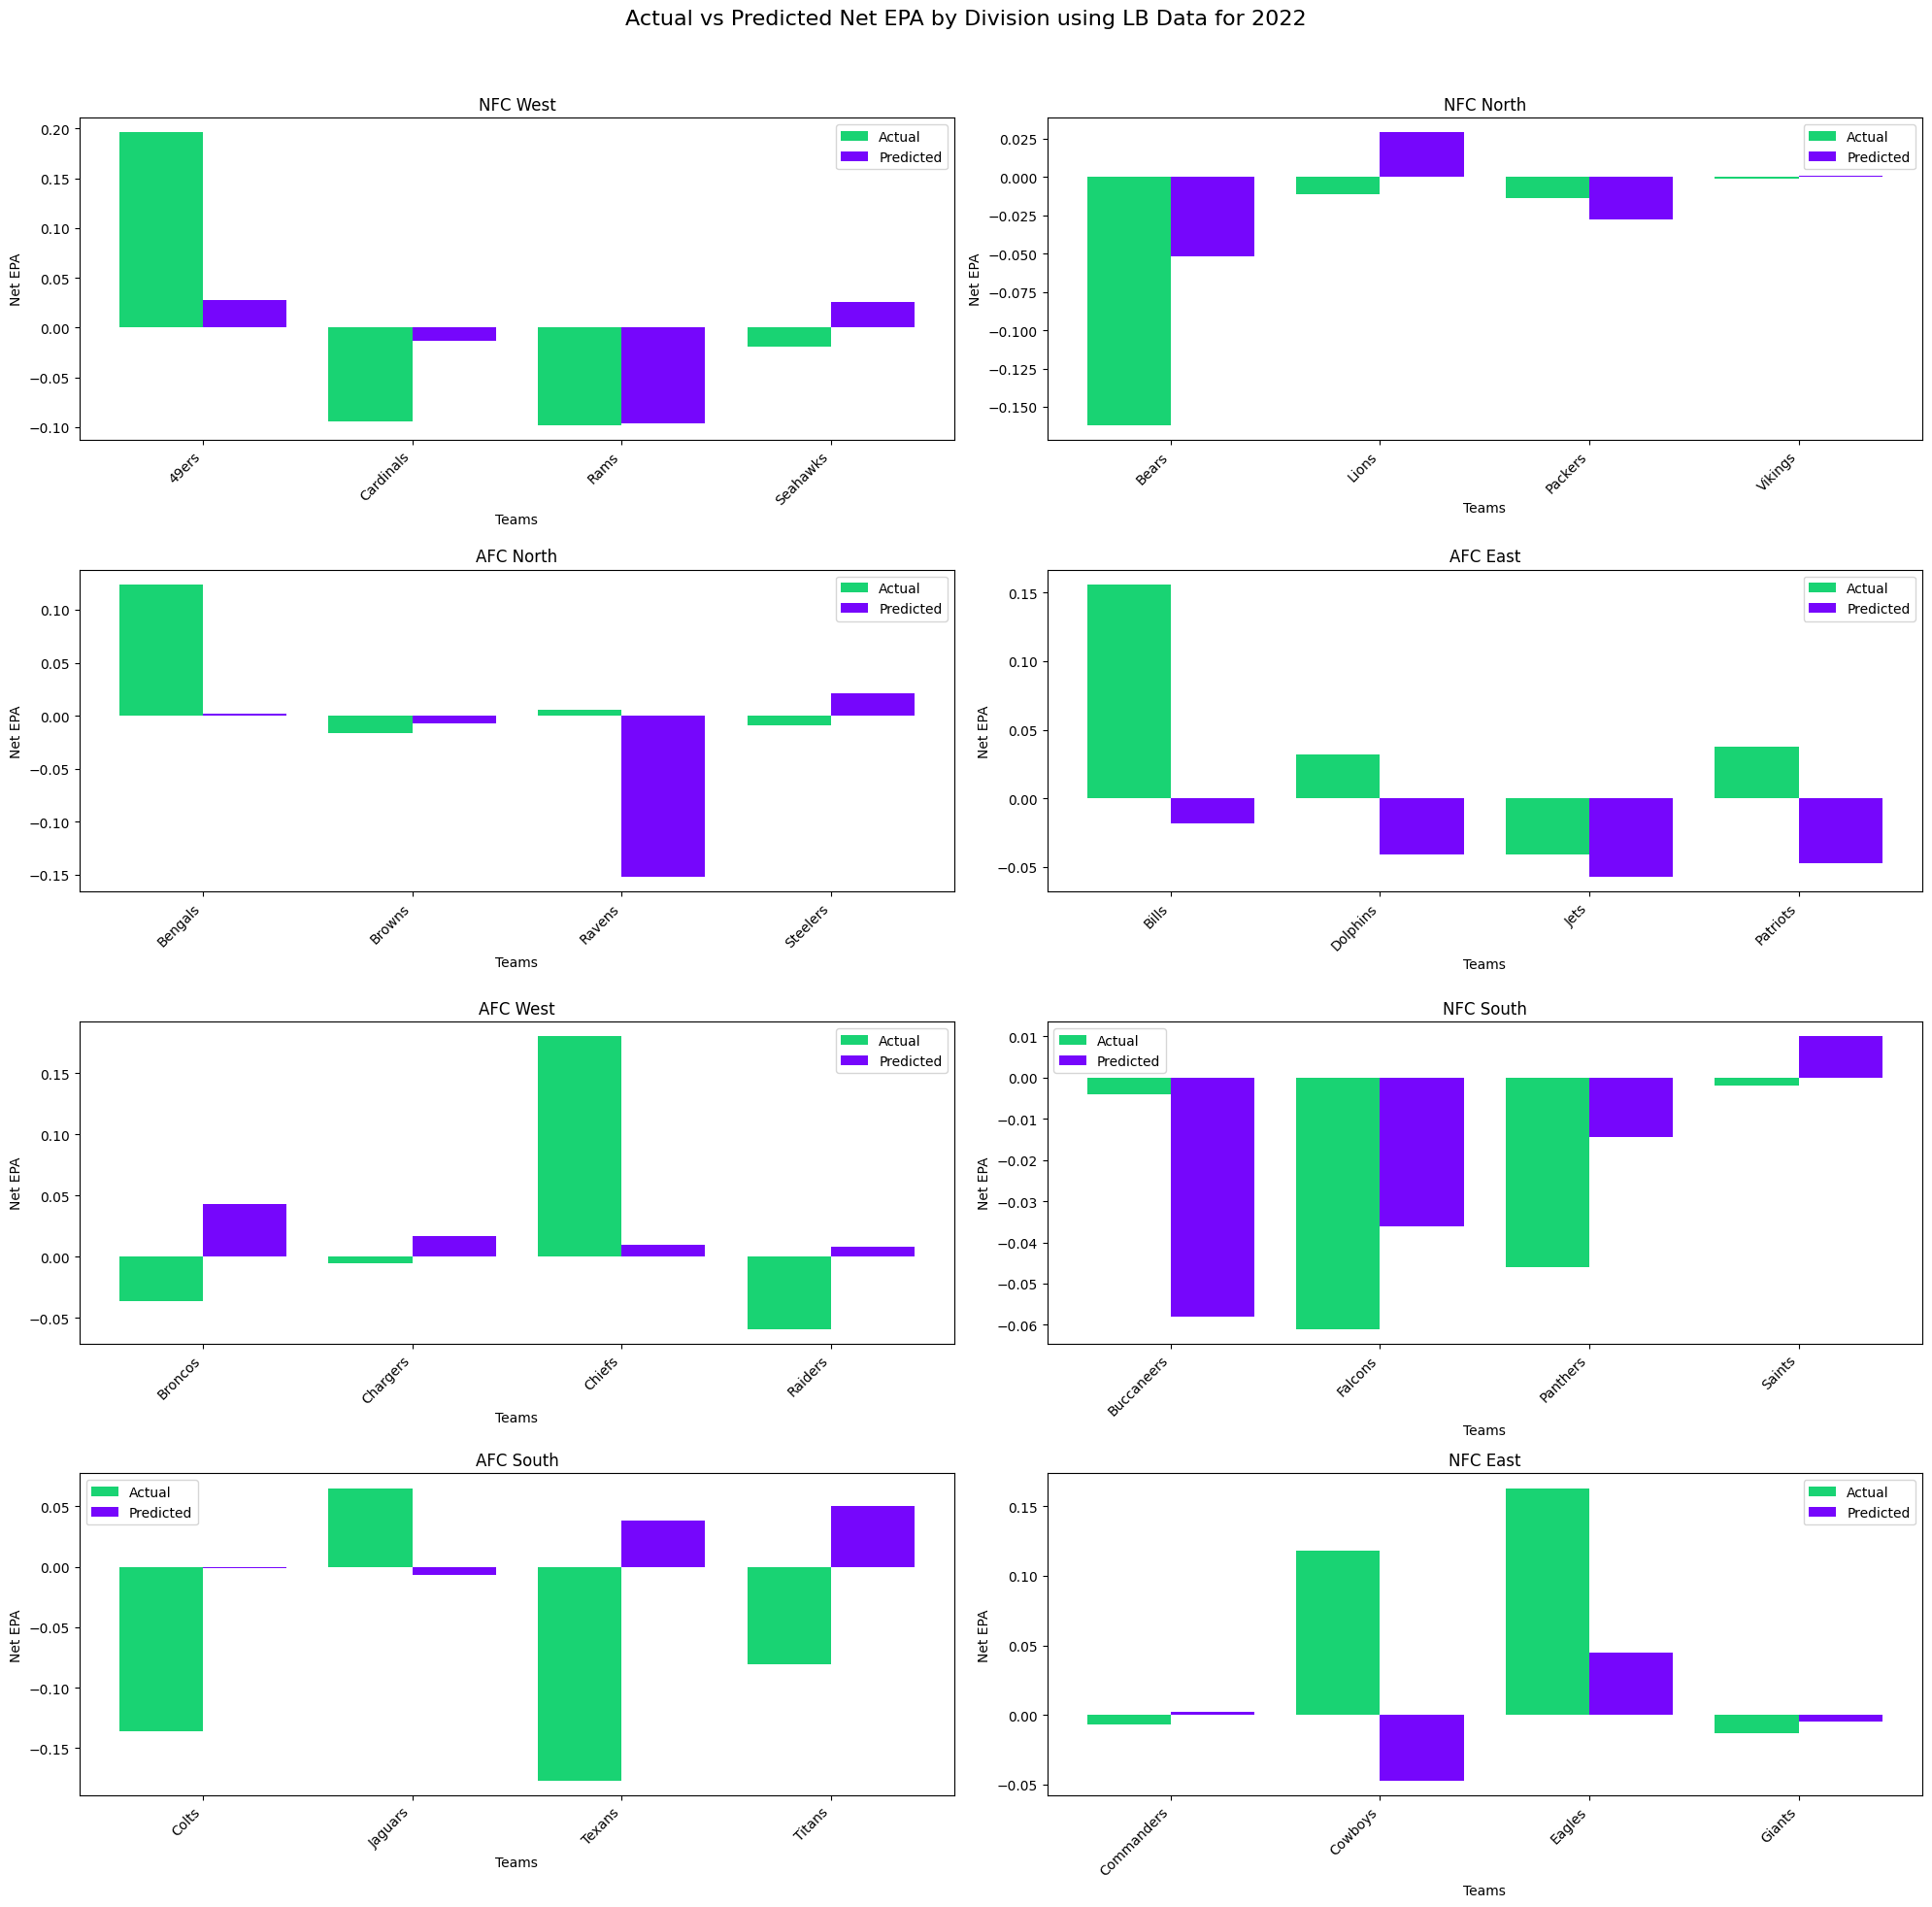

Epoch 1/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0159 - val_loss: 0.0127
Epoch 2/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0149 - val_loss: 0.0133
Epoch 3/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0143 - val_loss: 0.0148
Epoch 4/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146 - val_loss: 0.0179
Epoch 5/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0210 - val_loss: 0.0219
Epoch 6/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0185 - val_loss: 0.0243
Epoch 7/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0173 - val_loss: 0.0183
Epoch 8/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0184 - val_loss: 0.0130
Epoch 9/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146 - val_loss: 0.0171
Epoch 10/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0110 - val_loss: 0.0219
Epoch 11/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0112 - val_loss: 0.0178
Epoch 12/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0124 - val_loss: 0.0121

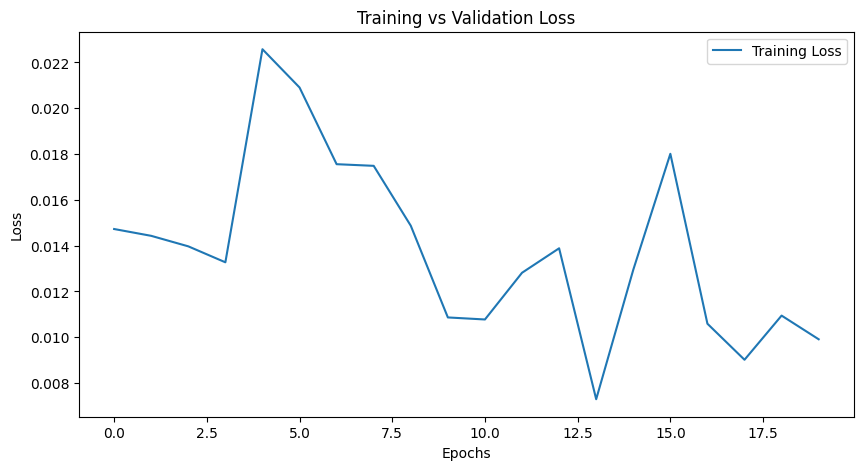

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32
R² Score: -0.2450


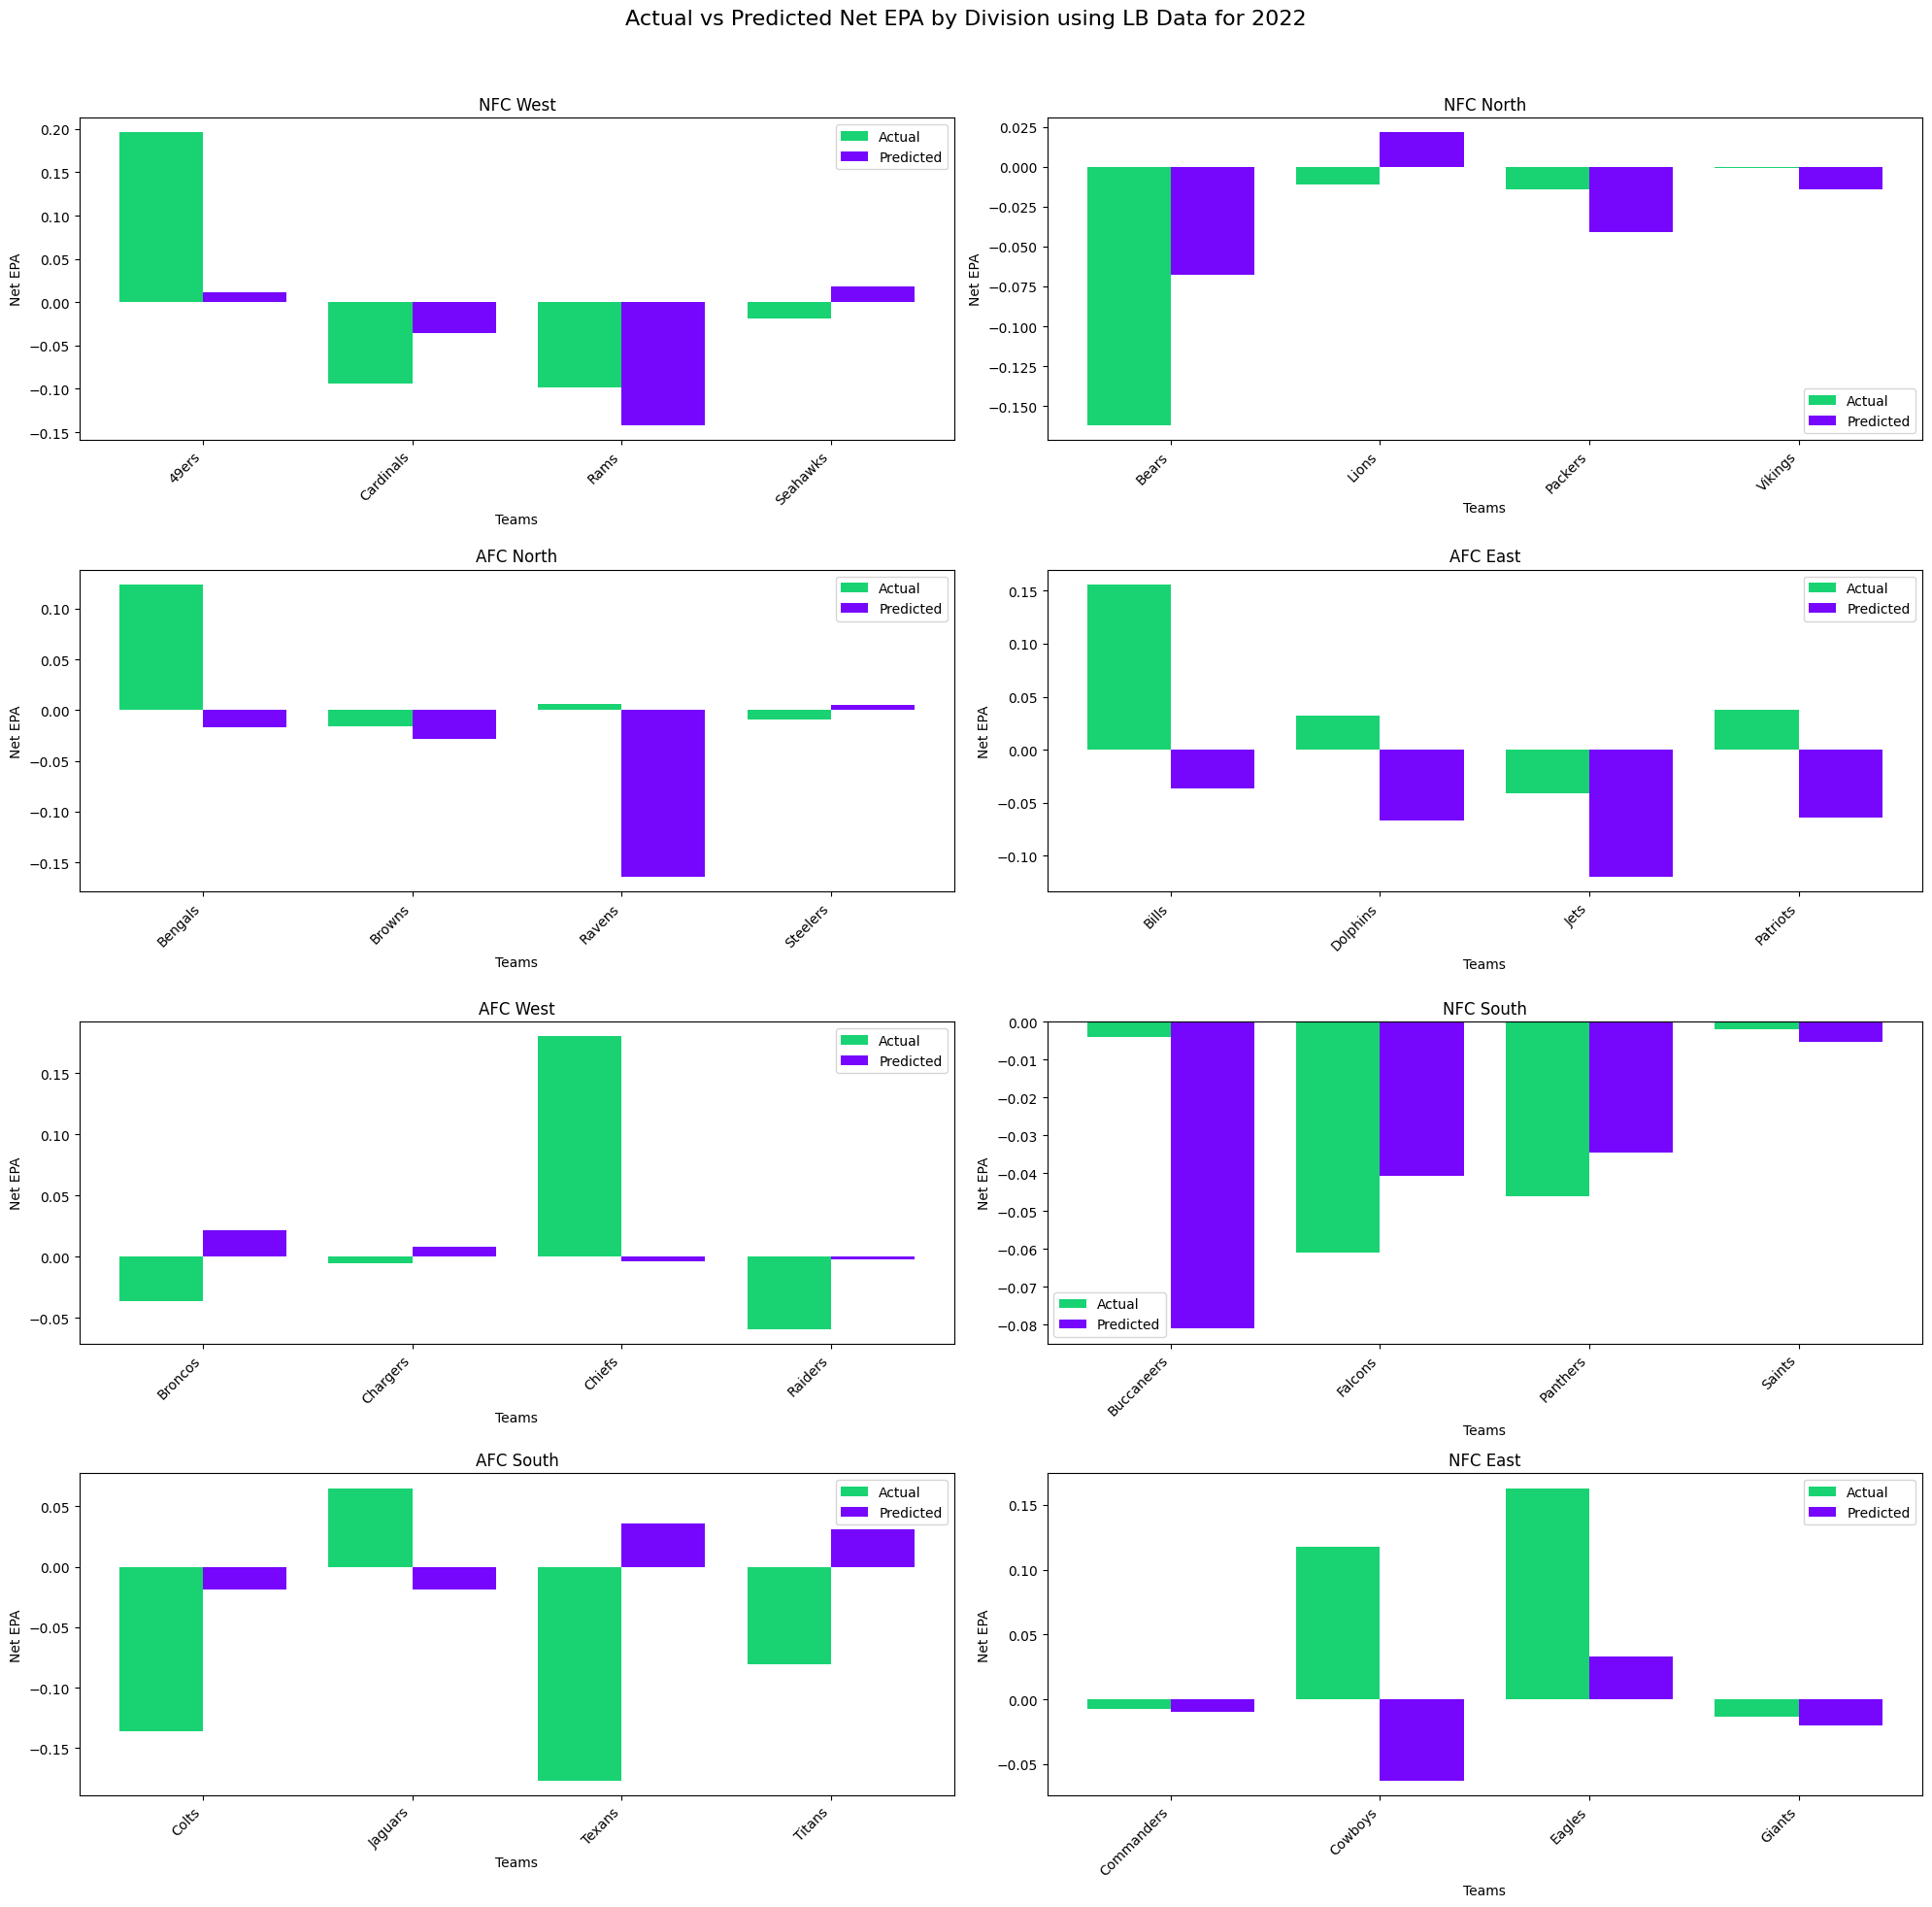

Epoch 1/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0211 - val_loss: 0.0165
Epoch 2/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0134 - val_loss: 0.0181
Epoch 3/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0133 - val_loss: 0.0172
Epoch 4/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0120 - val_loss: 0.0133
Epoch 5/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0151 - val_loss: 0.0115
Epoch 6/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0219 - val_loss: 0.0150
Epoch 7/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0123 - val_loss: 0.0196
Epoch 8/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0130 - val_loss: 0.0192
Epoch 9/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - val_loss: 0.0173
Epoch 10/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 - val_loss: 0.0137
Epoch 11/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0080 - val_loss: 0.0130
Epoch 12/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0078 - val_loss: 0.0133


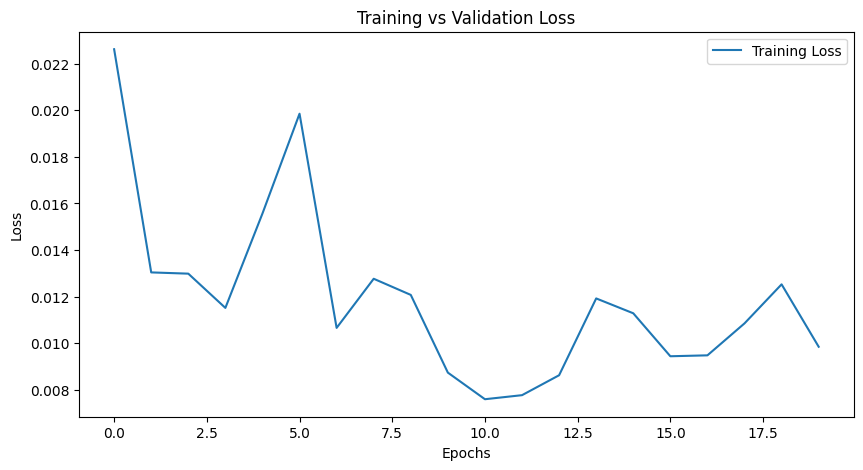

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32
R² Score: -0.1524


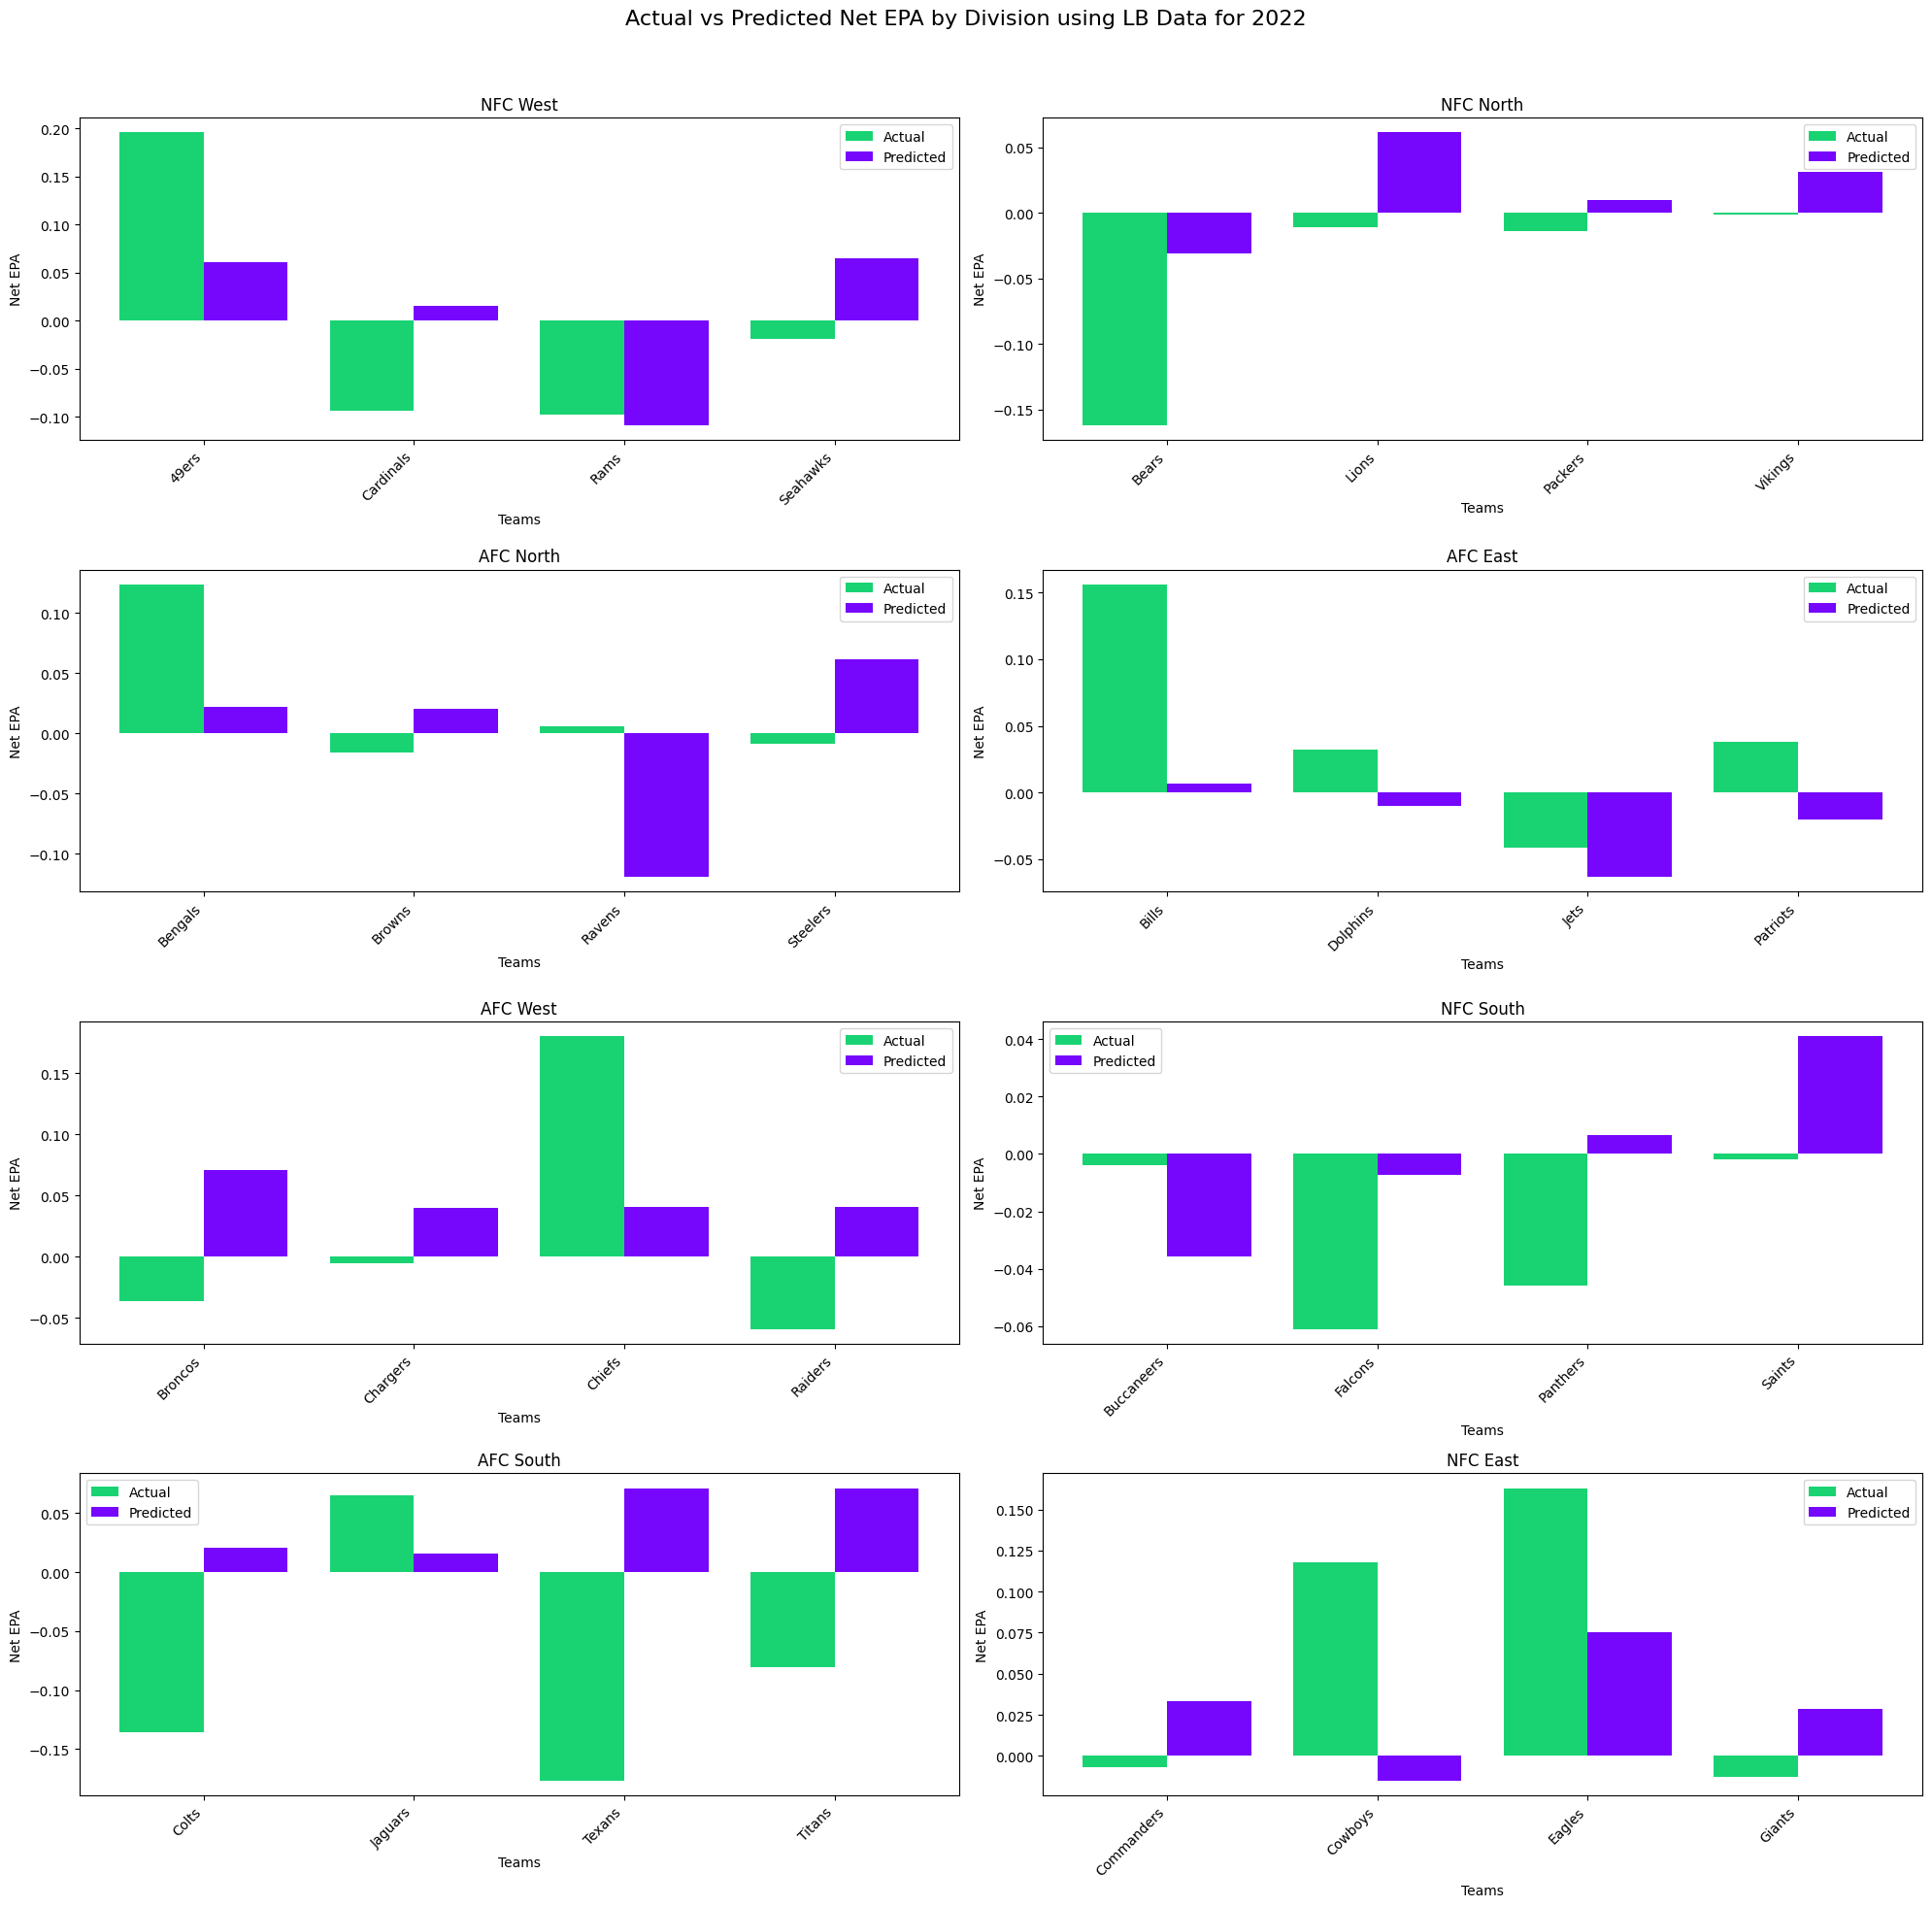

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0165 - val_loss: 0.0138
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0128 - val_loss: 0.0175
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0128 - val_loss: 0.0189
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0143 - val_loss: 0.0134
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0195 - val_loss: 0.0117
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0105 - val_loss: 0.0122
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0139 - val_loss: 0.0177
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0166 - val_loss: 0.0196
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0119 - val_loss: 0.0157
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0109 - val_loss: 0.0118
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146 - val_loss: 0.0106
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0093 - val_loss: 0.

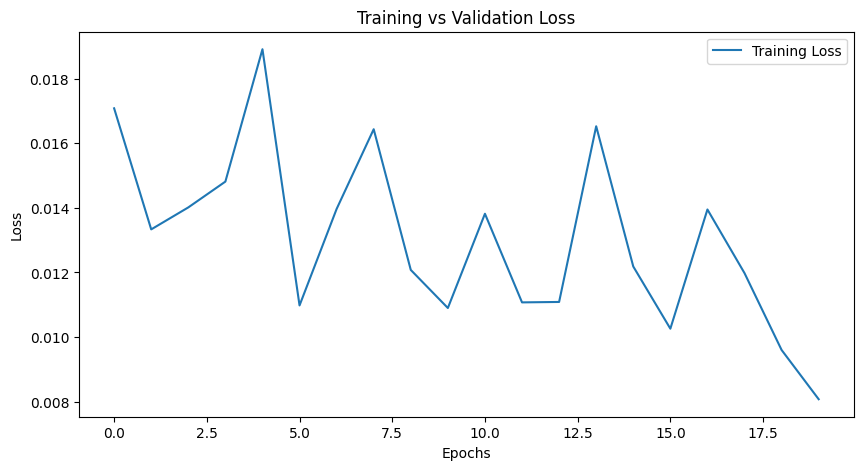

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32
R² Score: -0.1067


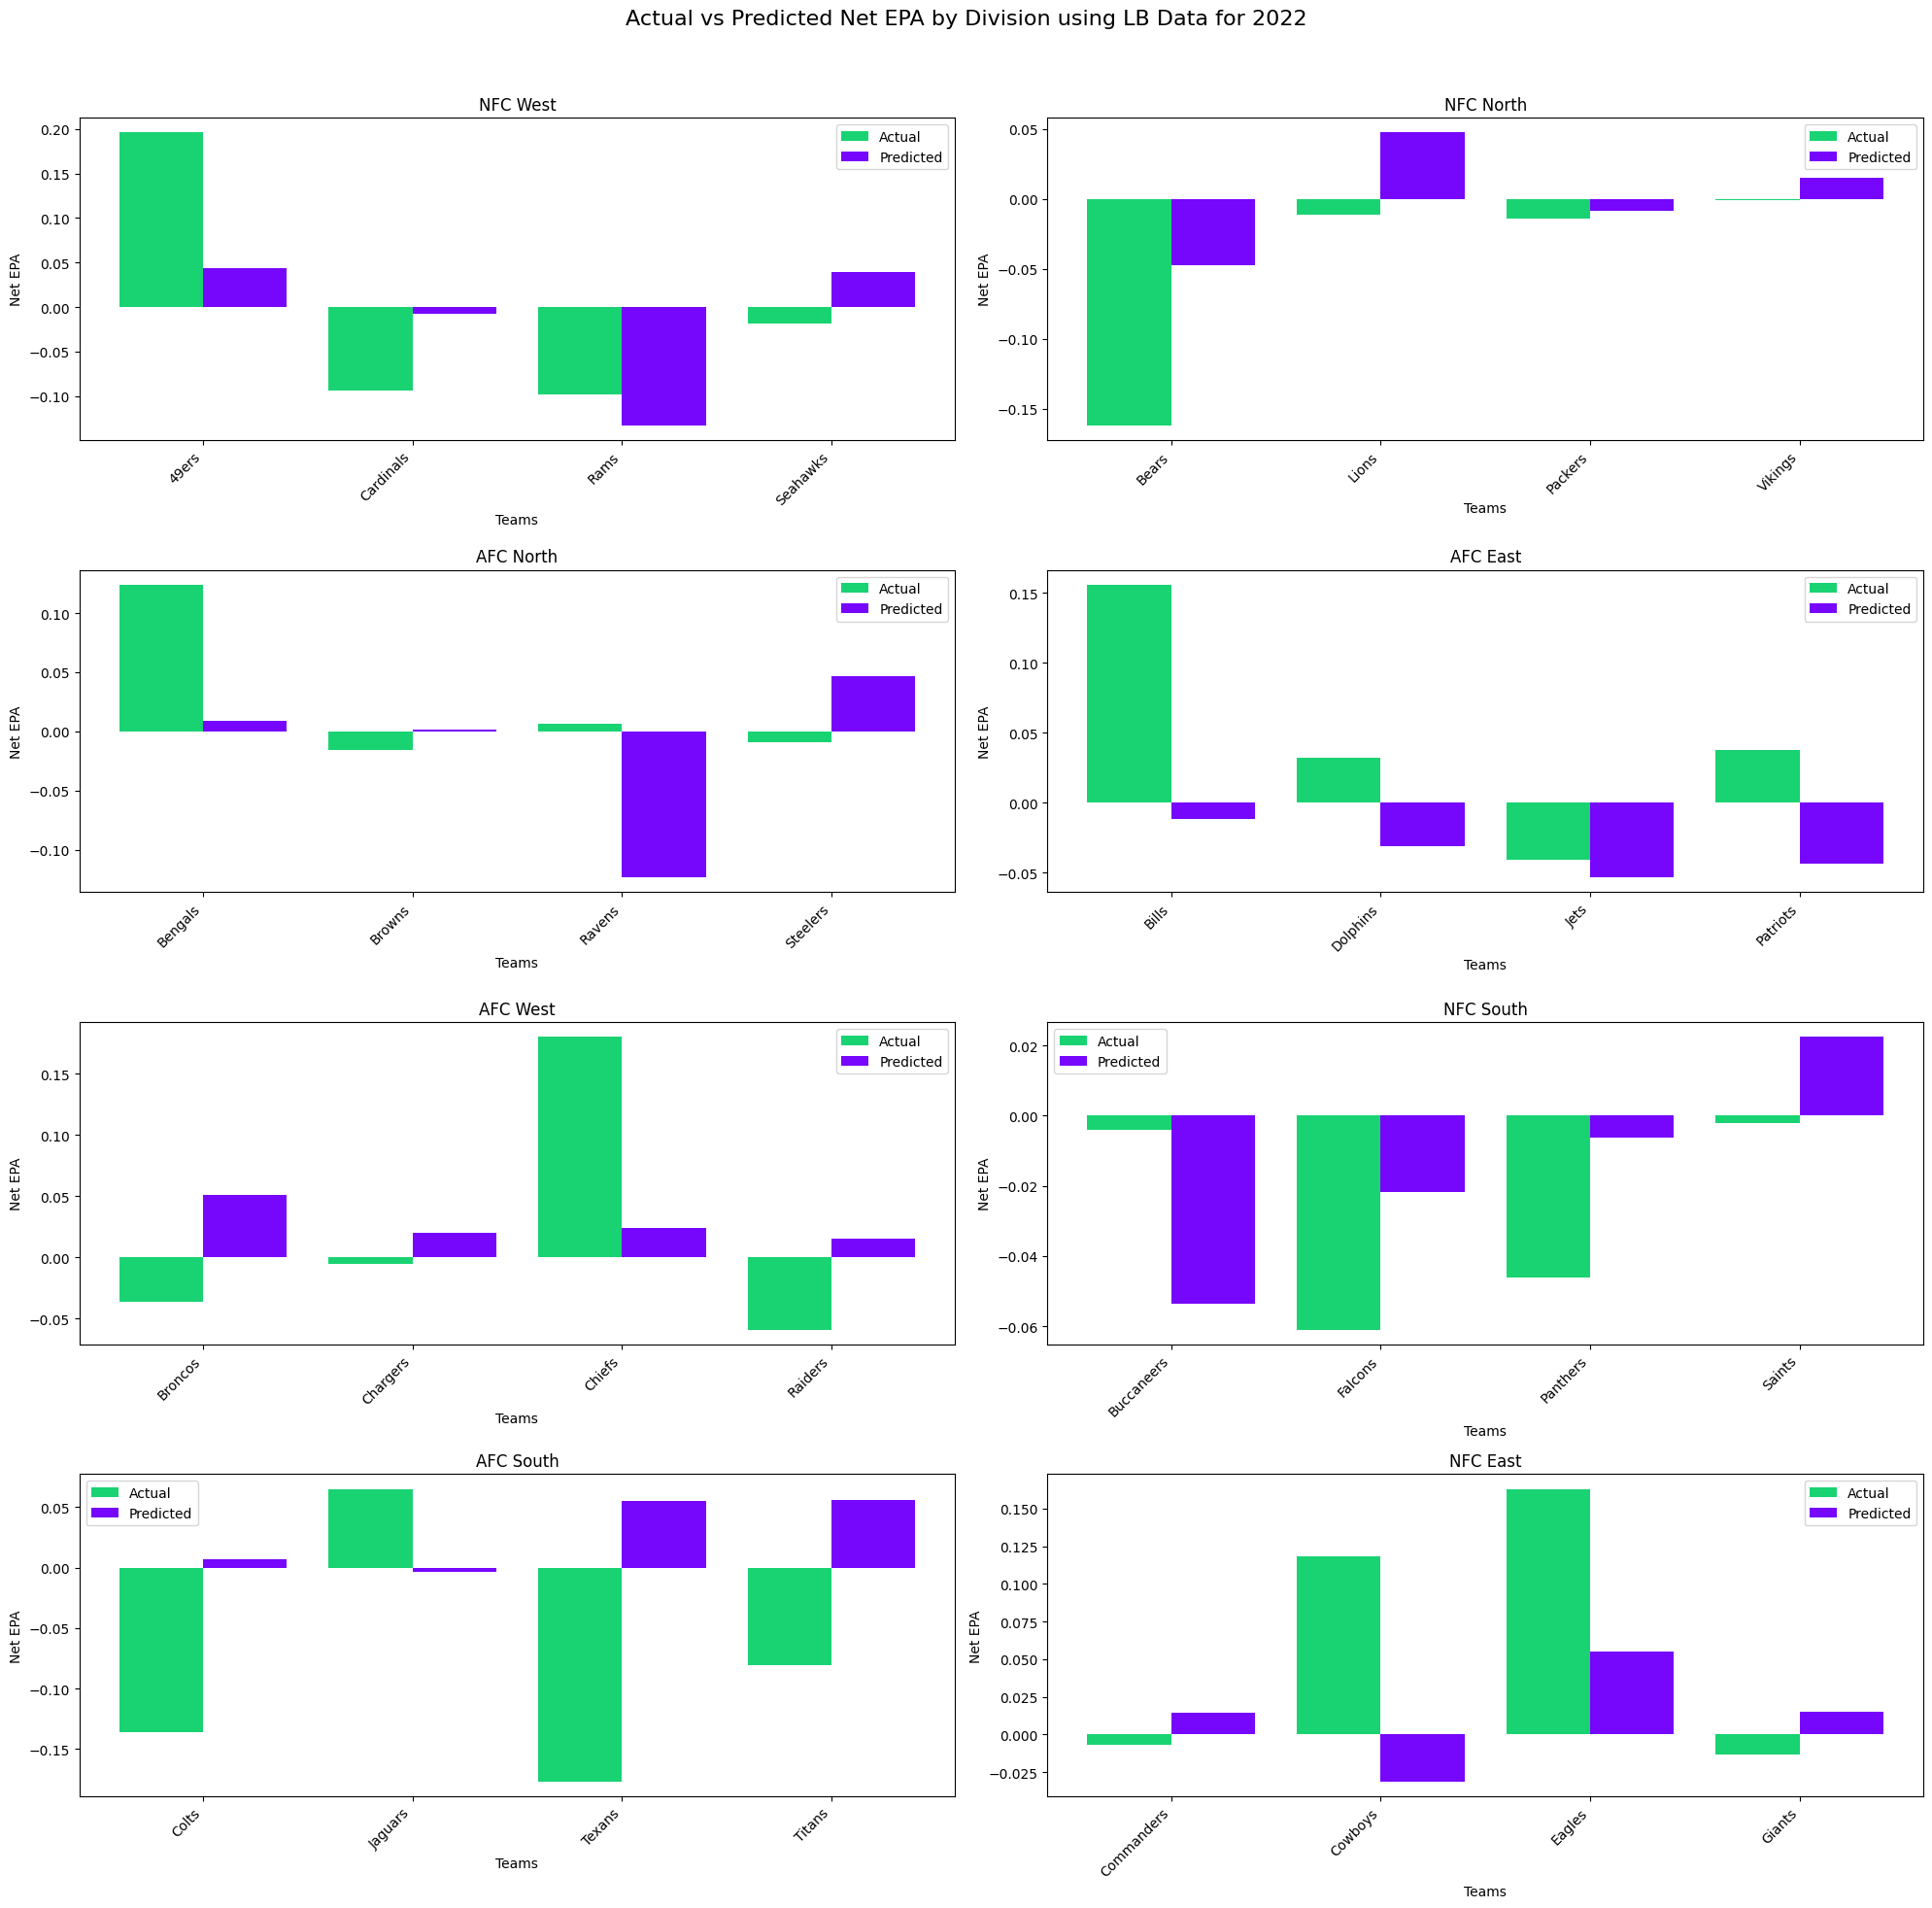

In [48]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=16, validation_split=0.2, callbacks=[early_stopping])
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    print(len(y_pred))
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    data = df[df['Year'] == 2022].copy()
    data['Predicted_Net_EPA'] = y_pred
    data['Model Actual Net EPA'] = y
    divisions = {
    "49ers": "NFC West", "Bears": "NFC North", "Bengals": "AFC North", "Bills": "AFC East",
    "Broncos": "AFC West", "Browns": "AFC North", "Buccaneers": "NFC South",
    "Cardinals": "NFC West", "Chargers": "AFC West", "Chiefs": "AFC West", "Colts": "AFC South",
    "Commanders": "NFC East", "Cowboys": "NFC East", "Dolphins": "AFC East", "Eagles": "NFC East",
    "Falcons": "NFC South", "Giants": "NFC East", "Jaguars": "AFC South", "Jets": "AFC East",
    "Lions": "NFC North", "Packers": "NFC North", "Panthers": "NFC South", "Patriots": "AFC East",
    "Raiders": "AFC West", "Rams": "NFC West", "Ravens": "AFC North", "Saints": "NFC South",
    "Seahawks": "NFC West", "Steelers": "AFC North", "Texans": "AFC South", "Titans": "AFC South",
    "Vikings": "NFC North"
}

    # Add the "Division" column
    data["Division"] = data["Team"].map(divisions)
    columns_to_keep = ['Net EPA', 'Predicted_Net_EPA', 'Team', 'Model Actual Net EPA', 'Division']
    data = data.loc[:, columns_to_keep]
    
    divisions = data["Division"].unique()
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns

    for ax, division in zip(axes.flatten(), divisions):
        fig.suptitle('Actual vs Predicted Net EPA by Division using LB Data for 2022', fontsize=16)
        division_data = data[data["Division"] == division]
        x = np.arange(4)  # Generate x-axis positions
        width = 0.4  # Bar width
        # Plot actual and predicted for this division
        ax.bar(x - width / 2, division_data['Net EPA'], width, label='Actual', color='#19D373')  # Hex for Actual
        ax.bar(x + width / 2, division_data['Predicted_Net_EPA'], width, label='Predicted', color='#7606FC')  # Hex for Predicted
        
        ax.set_xticks(x)
        ax.set_xticklabels(division_data['Team'], rotation=45, ha='right')
        ax.set_title(division)
        ax.set_xlabel('Teams')
        ax.set_ylabel('Net EPA')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()